In [163]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [164]:
# Reading the dataset
HCHO_data = pd.read_csv('Cleaned_HCHO_Data.csv')

In [165]:
# Dataset Head
HCHO_data.head()

HCHO Reading        Location Current Date   Next Date
0      0.000197  Colombo Proper   2019-01-01  2019-01-02
1      0.000263  Colombo Proper   2019-01-02  2019-01-03
2      0.000099  Colombo Proper   2019-01-03  2019-01-04
3      0.000210  Colombo Proper   2019-01-04  2019-01-05
4      0.000179  Colombo Proper   2019-01-05  2019-01-06

# Seasonal Trends in the Dataframe

### HCHO air changes over past years

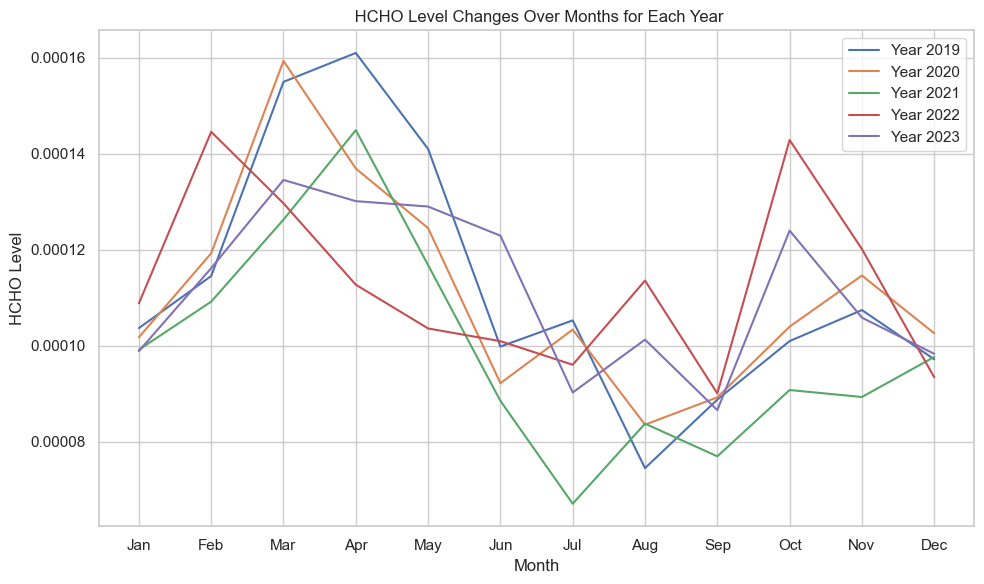

In [166]:
# Extract year and month from the Date column
HCHO_data['Year'] = pd.to_datetime(HCHO_data['Current Date']).dt.year
HCHO_data['Month'] = pd.to_datetime(HCHO_data['Current Date']).dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho = HCHO_data.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Loop through each year and plot HCHO levels over months
for year in monthly_mean_hcho['Year'].unique():
    data_year = monthly_mean_hcho[monthly_mean_hcho['Year'] == year]
    plt.plot(data_year['Month'], data_year['HCHO Reading'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title(' HCHO Level Changes Over Months for Each Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


well when comapring HCHO Level varies over the months in every year we can see in every year the months between june - september HCHO levels are gradually lower. and also in the months of march to may they are comparetively higher. This HCHO air pollution can increased due to several reasons. Let's check some of the reasons that may affect HCHO air level.

1. Fuel-Burning Appliances
2. Vehicle Emissions
3. Tobacco Smoke
4. Carpenting
5. Fabrics
6. Building Materials

##  Weather Seasons in Sri Lanka

In Comparision to Weather of Sri Lanka. There are mainly 2 Seasons and one inter-monsol period.

1. Southwest Monsoon (Yala): This monsoon typically occurs from May to September, bringing heavy rain to the southwestern regions of the country.
2. Northeast Monsoon (Maha): Running from October to January, the northeast monsoon predominantly affects the eastern and northern regions of Sri Lanka. These regions experience their primary rainy season.
3. Inter-monsoonal Periods: These occur from March to April and from September to October. During these transitional periods, the weather can be less predictable, with intermittent showers and occasional thunderstorms.

Now based on these two seasons we can see that from month May to September the HCHO Levels take a lower ammount and from September to April, May the HCHO Levels are higher. One of the reasons for that can be this two main seasons in Sri Lanka. Now Let's See how these seasons effects the HCHO Level in the country.

Let's Consider Year by Year to build a hypothesis.

### Year 2019 Weather Seasons 

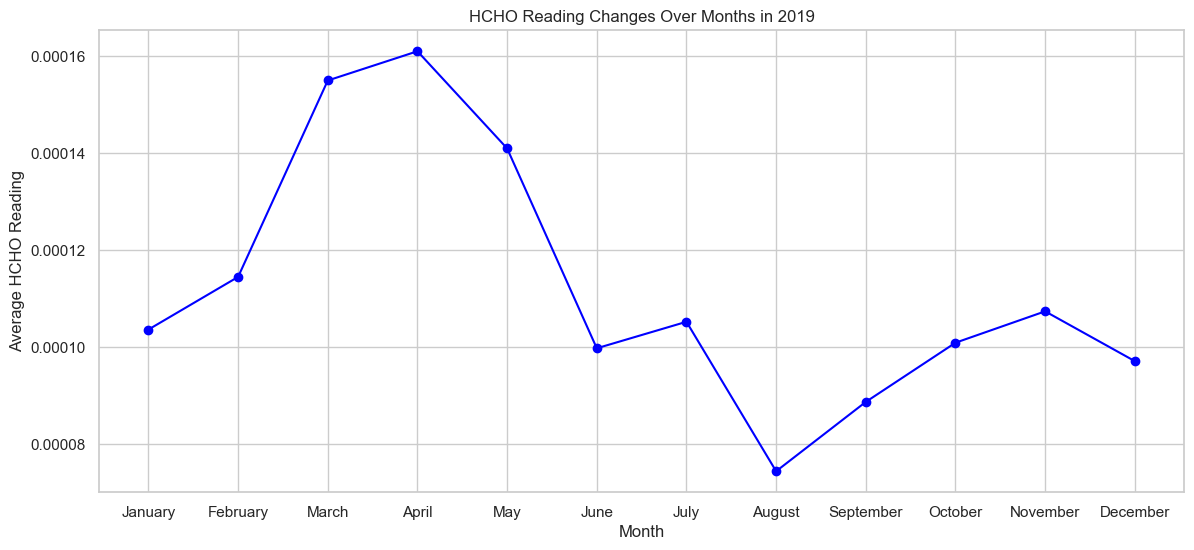

In [167]:
# Data Distribution of the HCHO Levels in the year 2019
# Filter the data for the year 2019
HCHO_2019 = HCHO_data[HCHO_data['Year'] == 2019]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2019.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2019')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.grid(True)
plt.show()

In year 2019 we can see that from month February to June Higher HCHO Levels are showed. These higher levels in inter-monsoonal period. which is march - april. well its one factor that needed to be remembered when considering the HCHO Levels. Lets give a summary of HCHO Readings in Seasons.

In [168]:
HCHO_2019.head()

HCHO Reading        Location Current Date   Next Date  Year  Month
0      0.000197  Colombo Proper   2019-01-01  2019-01-02  2019      1
1      0.000263  Colombo Proper   2019-01-02  2019-01-03  2019      1
2      0.000099  Colombo Proper   2019-01-03  2019-01-04  2019      1
3      0.000210  Colombo Proper   2019-01-04  2019-01-05  2019      1
4      0.000179  Colombo Proper   2019-01-05  2019-01-06  2019      1

In [169]:
# Sumamary of HCHO Levels in the weather Seasons
Southwest_monsoon = [5,6,7,8] # months numbers
Northeast_monsoon = [10,11,12,1]
Inter_monsoonal_period = [3,4,9]

# Filter the data for each weather season
southwest_monsoon_data_2019 = HCHO_2019[HCHO_2019['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2019 = HCHO_2019[HCHO_2019['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2019 = HCHO_2019[HCHO_2019['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2019 = southwest_monsoon_data_2019['HCHO Reading'].mean()
northeast_monsoon_avg_2019 = northeast_monsoon_data_2019['HCHO Reading'].mean()
inter_monsoonal_avg_2019 = inter_monsoonal_data_2019['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2019)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2019)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2019)


Average HCHO levels in Southwest Monsoon: 0.00010520568021477011
Average HCHO levels in Northeast Monsoon: 0.00010224879267291063
Average HCHO levels in Inter-Monsoonal Period: 0.00013477159601114812


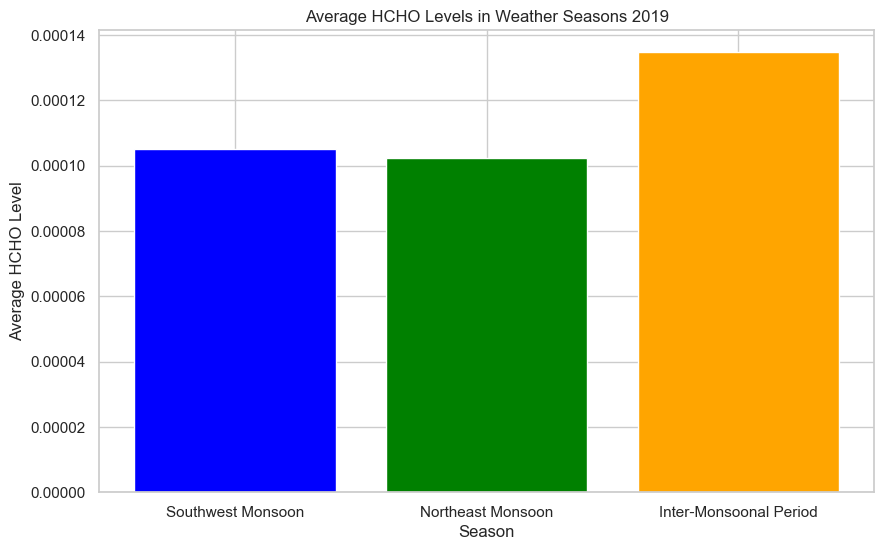

In [170]:
#Plot the average HCHO levels for each season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']
avg_levels_2019 = [southwest_monsoon_avg_2019, northeast_monsoon_avg_2019, inter_monsoonal_avg_2019]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels_2019, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2019')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2020 Weather Seasons

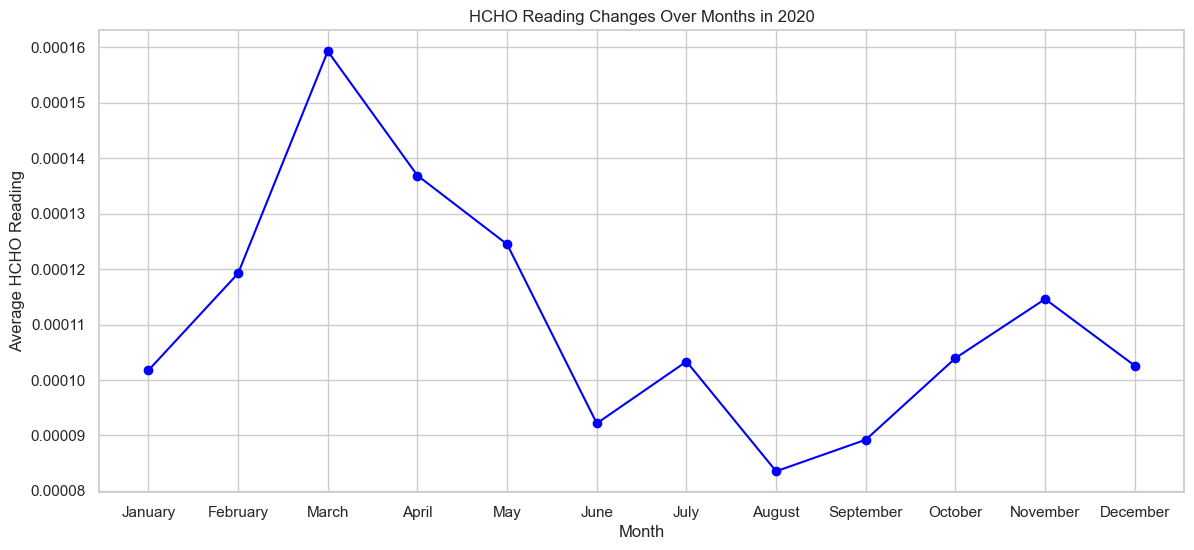

In [171]:
# Data Distribution of the HCHO Levels in the year 2020
# Filter the data for the year 2020
HCHO_2020 = HCHO_data[HCHO_data['Year'] == 2020]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2020.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2020')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

Again in the month of February to April there is a slight increasing the HCHO Levels. From April to August its decreasing. Let's summarise the HCHO levels in this Year too.

In [172]:
# Filter the data for each weather season
southwest_monsoon_data_2020 = HCHO_2020[HCHO_2020['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2020 = HCHO_2020[HCHO_2020['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2020 = HCHO_2020[HCHO_2020['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2020 = southwest_monsoon_data_2020['HCHO Reading'].mean()
northeast_monsoon_avg_2020 = northeast_monsoon_data_2020['HCHO Reading'].mean()
inter_monsoonal_avg_2020 = inter_monsoonal_data_2020['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2020)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2020)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2020)

Average HCHO levels in Southwest Monsoon: 0.00010073195916207954
Average HCHO levels in Northeast Monsoon: 0.00010570165284173087
Average HCHO levels in Inter-Monsoonal Period: 0.00012832307276960792


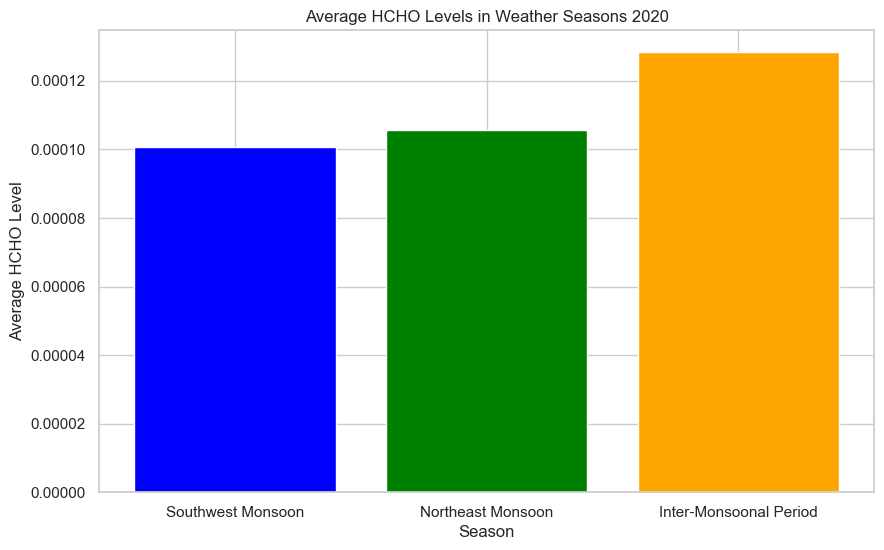

In [173]:
#Plot the average HCHO levels for each season
avg_levels_2020 = [southwest_monsoon_avg_2020, northeast_monsoon_avg_2020, inter_monsoonal_avg_2020]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels_2020, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2020')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2021 Weather Seasons

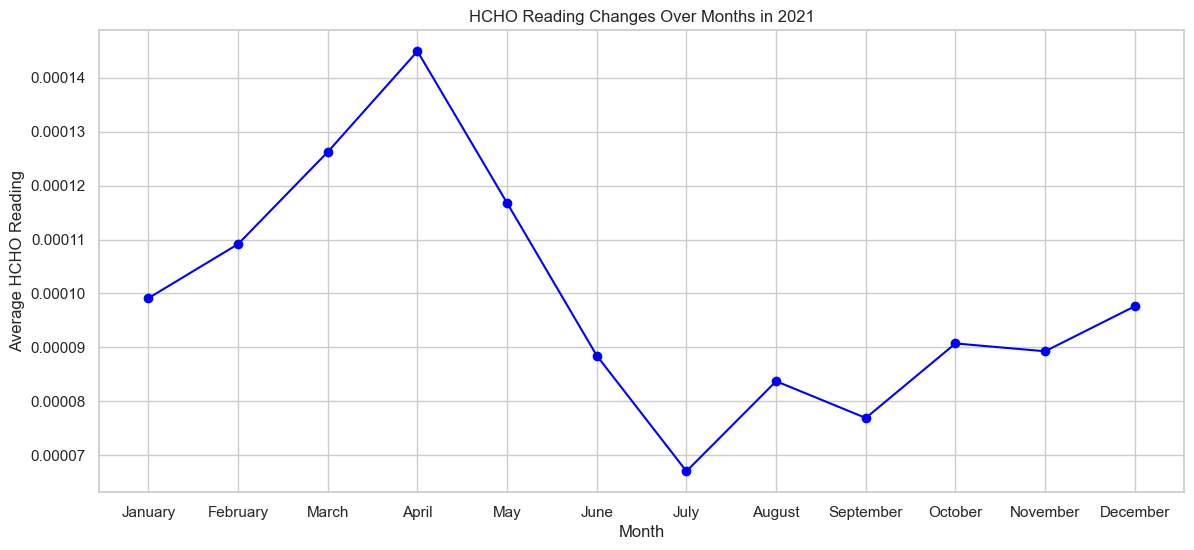

In [174]:
# Data Distribution of the HCHO Levels in the year 2021
# Filter the data for the year 2021
HCHO_2021 = HCHO_data[HCHO_data['Year'] == 2021]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2021.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2021')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

In this year there is a gradual increase within january - april and peak in april and it decreases.

In [175]:
# Filter the data for each weather season
southwest_monsoon_data_2021 = HCHO_2021[HCHO_2021['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2021 = HCHO_2021[HCHO_2021['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2021 = HCHO_2021[HCHO_2021['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2021 = southwest_monsoon_data_2021['HCHO Reading'].mean()
northeast_monsoon_avg_2021 = northeast_monsoon_data_2021['HCHO Reading'].mean()
inter_monsoonal_avg_2021 = inter_monsoonal_data_2021['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2021)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2021)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2021)

Average HCHO levels in Southwest Monsoon: 8.873693725097518e-05
Average HCHO levels in Northeast Monsoon: 9.423937604867064e-05
Average HCHO levels in Inter-Monsoonal Period: 0.00011615001817215642


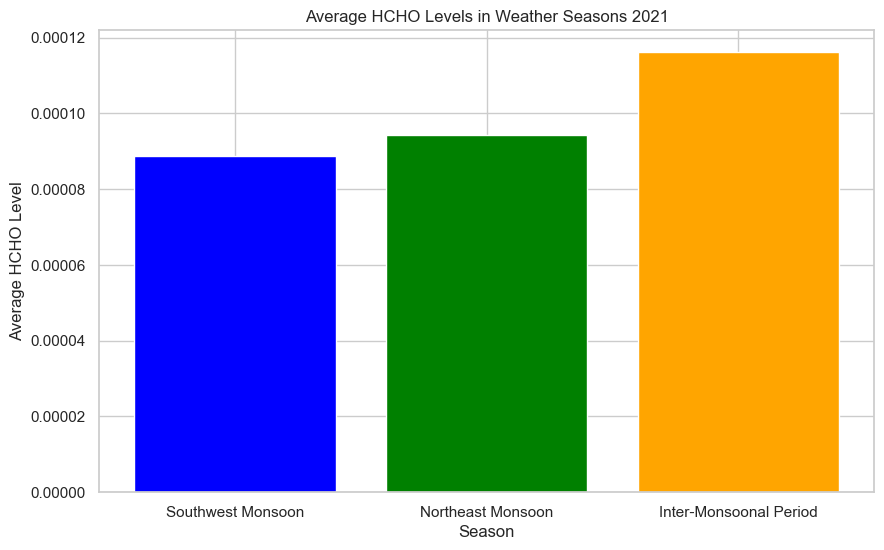

In [176]:
#Plot the average HCHO levels for each season
avg_levels_2021 = [southwest_monsoon_avg_2021, northeast_monsoon_avg_2021, inter_monsoonal_avg_2021]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels_2021, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2021')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2022 Weather Seasons

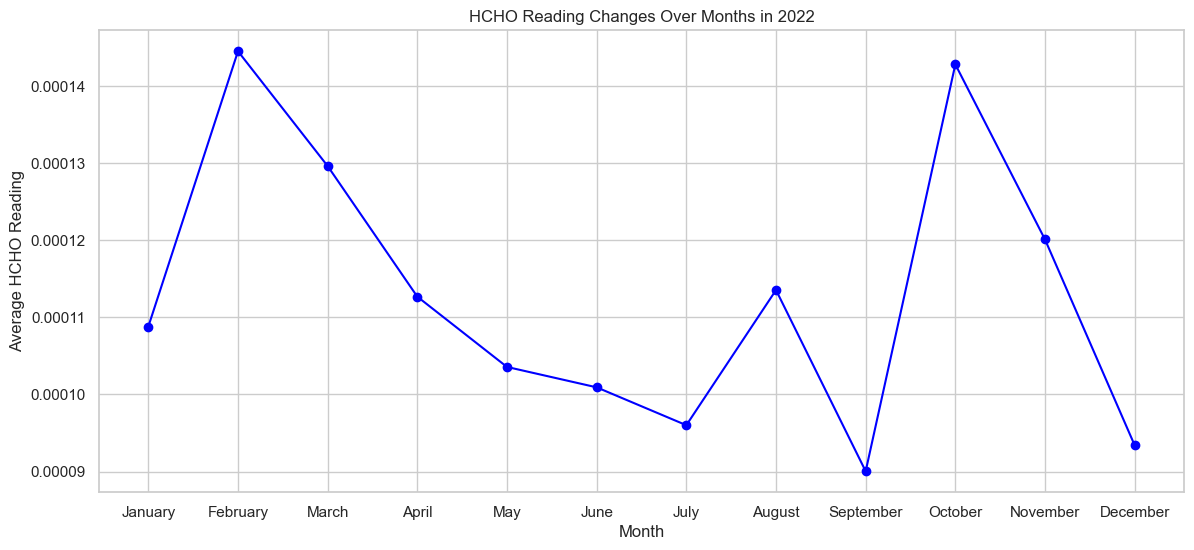

In [177]:
# Data Distribution of the HCHO Levels in the year 2022
# Filter the data for the year 2021
HCHO_2022 = HCHO_data[HCHO_data['Year'] == 2022]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2022.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2022')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

In 2022 also HCHO Level peaks in February and getting gradually lower within march - july. The interesting point is HCHO level again peaks in the October month which is kinda unfamilliar within previous years.

In [178]:
# Filter the data for each weather season
southwest_monsoon_data_2022 = HCHO_2022[HCHO_2022['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2022 = HCHO_2022[HCHO_2022['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2022 = HCHO_2022[HCHO_2022['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2022 = southwest_monsoon_data_2022['HCHO Reading'].mean()
northeast_monsoon_avg_2022 = northeast_monsoon_data_2022['HCHO Reading'].mean()
inter_monsoonal_avg_2022 = inter_monsoonal_data_2022['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2022)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2022)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2022)

Average HCHO levels in Southwest Monsoon: 0.0001035147713782886
Average HCHO levels in Northeast Monsoon: 0.00011640167470851234
Average HCHO levels in Inter-Monsoonal Period: 0.00011105000493455717


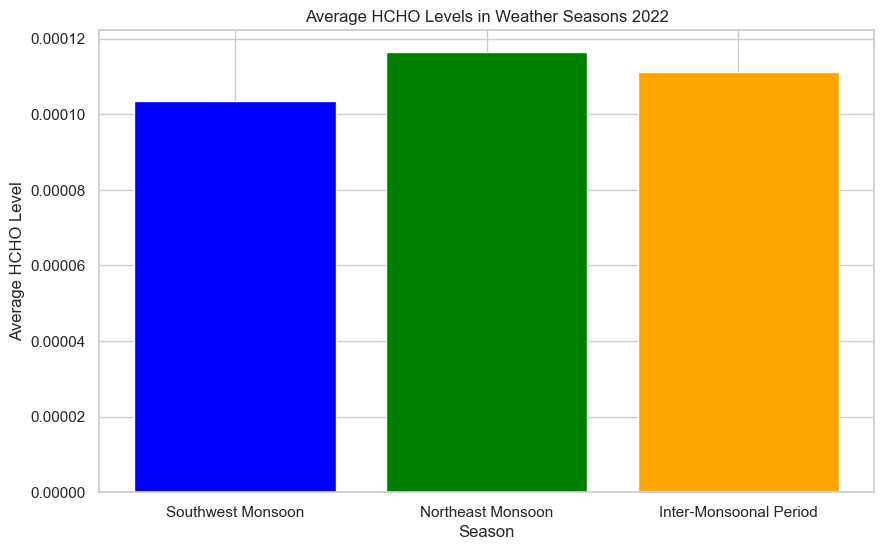

In [179]:
#Plot the average HCHO levels for each season
avg_levels_2022 = [southwest_monsoon_avg_2022, northeast_monsoon_avg_2022, inter_monsoonal_avg_2022]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels_2022, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2022')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2023 Weather Seasons

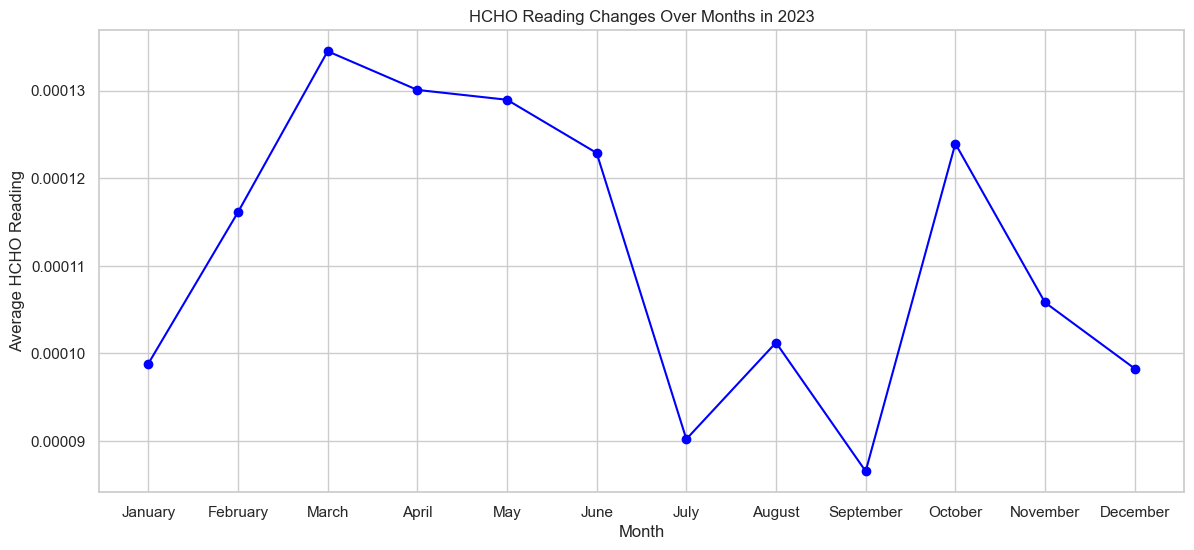

In [180]:
# Data Distribution of the HCHO Levels in the year 2023
# Filter the data for the year 2023
HCHO_2023 = HCHO_data[HCHO_data['Year'] == 2023]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2023.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2023')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

Again we can see that it peaks in February to April Time and descending in the July - September Seasons. Also same as the previous year there is a spike in the month of october.

In [181]:
# Filter the data for each weather season
southwest_monsoon_data_2023 = HCHO_2023[HCHO_2023['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2023 = HCHO_2023[HCHO_2023['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2023 = HCHO_2023[HCHO_2023['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2023 = southwest_monsoon_data_2023['HCHO Reading'].mean()
northeast_monsoon_avg_2023 = northeast_monsoon_data_2023['HCHO Reading'].mean()
inter_monsoonal_avg_2023 = inter_monsoonal_data_2023['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2023)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2023)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2023)

Average HCHO levels in Southwest Monsoon: 0.00011072115625760181
Average HCHO levels in Northeast Monsoon: 0.00010671376670109426
Average HCHO levels in Inter-Monsoonal Period: 0.00011711131595307323


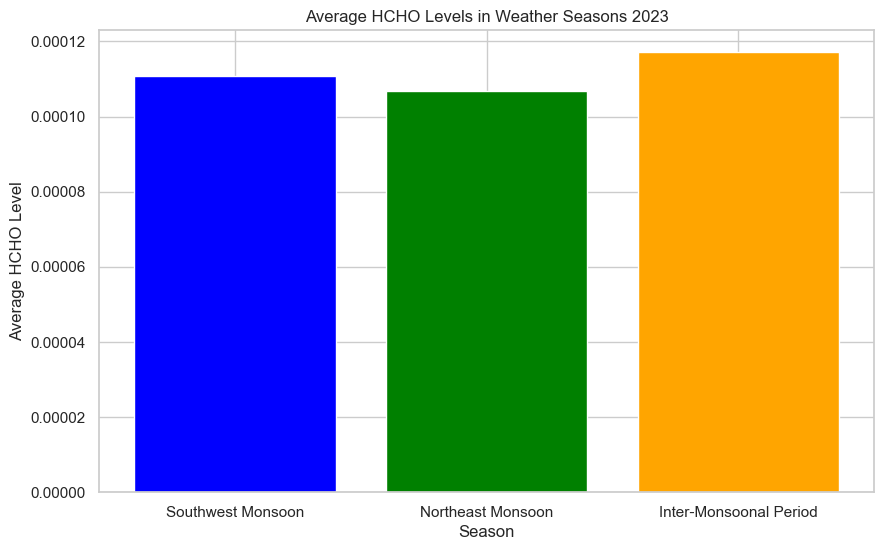

In [182]:
#Plot the average HCHO levels for each season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']
avg_levels_2023 = [southwest_monsoon_avg_2023, northeast_monsoon_avg_2023, inter_monsoonal_avg_2023]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels_2023, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2023')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

#### Comparison Between Weather Seasons in Sri Lanka over the years

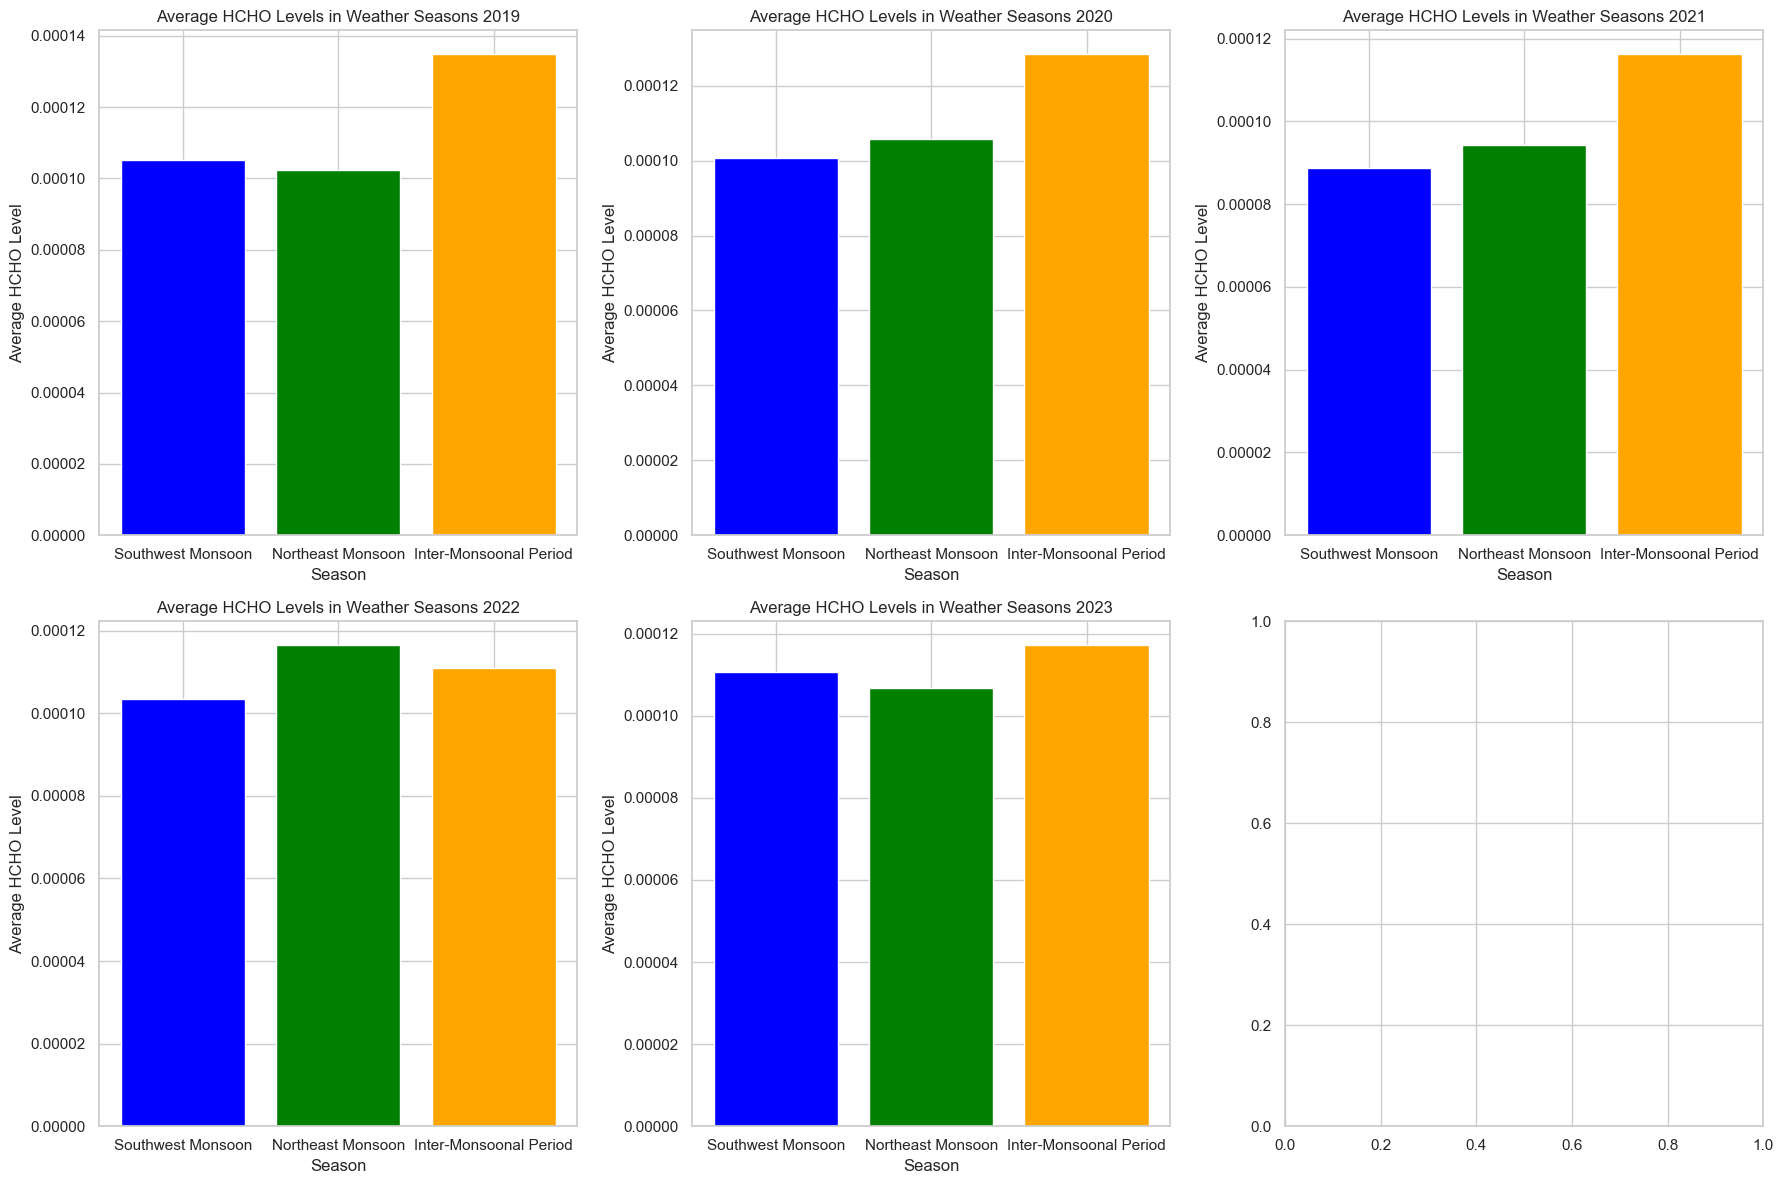

In [183]:
# Define the years
years = range(2019, 2024)
# Define the months for each weather season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']

# Define the average levels for each season for each year
avg_levels = {
    2019: avg_levels_2019,
    2020: avg_levels_2020,
    2021: avg_levels_2021,
    2022: avg_levels_2022,
    2023: avg_levels_2023
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i, year in enumerate(years):
    row_index = i // 3
    col_index = i % 3
    
    if year in avg_levels:
        # Plot average levels for each season in the current year
        axes[row_index, col_index].bar(seasons, avg_levels[year], color=['blue', 'green', 'orange'])
        axes[row_index, col_index].set_title('Average HCHO Levels in Weather Seasons {}'.format(year))
        axes[row_index, col_index].set_xlabel('Season')
        axes[row_index, col_index].set_ylabel('Average HCHO Level')
    else:
        # Remove empty subplot
        fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

In Conclusion, we can say that except for the year 2022 every high level of HCHO recorded in the Inter-Monsoonal Period. Again These weather seasons based mainly on temperature and rain summation. Let's see how these attributes affects the HCHO Levels with humidty, windspeed,  and Latitude and Langtitude in past few Years.

## Weather Data Comparison with Seasonal Changes

### Data Description

The Sri Lanka Weather Dataset is a comprehensive collection of weather data for 30 prominent cities in Sri Lanka, covering the period from January 1, 2010, to January 1, 2023. The dataset offers a wide range of meteorological parameters, enabling detailed analysis and insights into the climate patterns of different regions in Sri Lanka.

Dataset Features
1. Time
2. Weather Code
3. Temperature
4. Sunrise and Sunset
5. Shortwave Radiation: Sum of shortwave radiation received during the observation period.
6. Precipitation
7. Wind Speed and Gusts
8. Wind Direction
9. Evapotranspiration
10. Latitude, Longitude, and Elevation

Dataset Link :- https://www.kaggle.com/datasets/rasulmah/sri-lanka-weather-dataset

In [184]:
# Loading the Dataset
weather_data = pd.read_csv('Datasets\\External Data\\pre_proecessed_weather_data.csv')

#### Dataset Information

In [185]:
# Dataset information
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   year                        147480 non-null  int64  
 1   month                       147480 non-null  int64  
 2   day                         147480 non-null  int64  
 3   weathercode                 147480 non-null  int64  
 4   temperature_2m_max          147480 non-null  float64
 5   temperature_2m_min          147480 non-null  float64
 6   temperature_2m_mean         147480 non-null  float64
 7   apparent_temperature_max    147480 non-null  float64
 8   apparent_temperature_min    147480 non-null  float64
 9   apparent_temperature_mean   147480 non-null  float64
 10  shortwave_radiation_sum     147480 non-null  float64
 11  rain_sum                    147480 non-null  float64
 12  windspeed_10m_max           147480 non-null  float64
 13  windgusts_10m_

In [186]:
weather_data.head()

year  month  day  weathercode  temperature_2m_max  temperature_2m_min  \
0  2010      1    1            2                30.0                22.7   
1  2010      1    2           51                29.9                23.5   
2  2010      1    3           51                29.5                23.2   
3  2010      1    4            2                28.9                21.9   
4  2010      1    5            1                28.1                21.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 26.1                      34.4                      25.2   
1                 26.2                      33.8                      26.2   
2                 26.0                      34.3                      26.3   
3                 25.3                      31.6                      23.4   
4                 24.5                      30.1                      23.1   

   apparent_temperature_mean  shortwave_radiation_sum  rain_sum  \
0                       29.2                    20.92       0.0   
1                       29.8                    17.71       0.1   
2                       29.9                    17.76       0.6   
3                       27.8                    16.50       0.0   
4                       26.1                    23.61       0.0   

   windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  latitude  \
0               11.7               27.4                          20       7.0   
1               13.0               27.0                          24       7.0   
2               12.3               27.4                          16       7.0   
3               17.0               34.6                         356       7.0   
4               18.7               37.1                         355       7.0   

   longitude     city  
0  79.899994  Colombo  
1  79.899994  Colombo  
2  79.899994  Colombo  
3  79.899994  Colombo  
4  79.899994  Colombo

Hence for our comparison we need onlythe  data from 2019 to 2023 and mean temeperatures and the rain summations, windspeeds, windgusts and latitude and longtitudes only, Therefore this needs to be get rid of other features.

In [187]:
# Removing uncessary Data columns
weather_data = weather_data.drop(['day','temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','shortwave_radiation_sum','winddirection_10m_dominant'],axis=1)

In [188]:
# Necessary Dataframe
weather_data.head()

year  month  weathercode  temperature_2m_mean  apparent_temperature_mean  \
0  2010      1            2                 26.1                       29.2   
1  2010      1           51                 26.2                       29.8   
2  2010      1           51                 26.0                       29.9   
3  2010      1            2                 25.3                       27.8   
4  2010      1            1                 24.5                       26.1   

   rain_sum  windspeed_10m_max  windgusts_10m_max  latitude  longitude  \
0       0.0               11.7               27.4       7.0  79.899994   
1       0.1               13.0               27.0       7.0  79.899994   
2       0.6               12.3               27.4       7.0  79.899994   
3       0.0               17.0               34.6       7.0  79.899994   
4       0.0               18.7               37.1       7.0  79.899994   

      city  
0  Colombo  
1  Colombo  
2  Colombo  
3  Colombo  
4  Colombo

In this dataset there like 30 cities and data from 2010 like we doesn't need that much data so let's get rid of them too.

In [189]:
# Relevant Years
weather_data = weather_data[weather_data['year'].isin([2019, 2020,2021,2022,2023])]


## Weather Changes over the Year in each City 2019

### Colombo Proper

##### Temperature 2m Changes

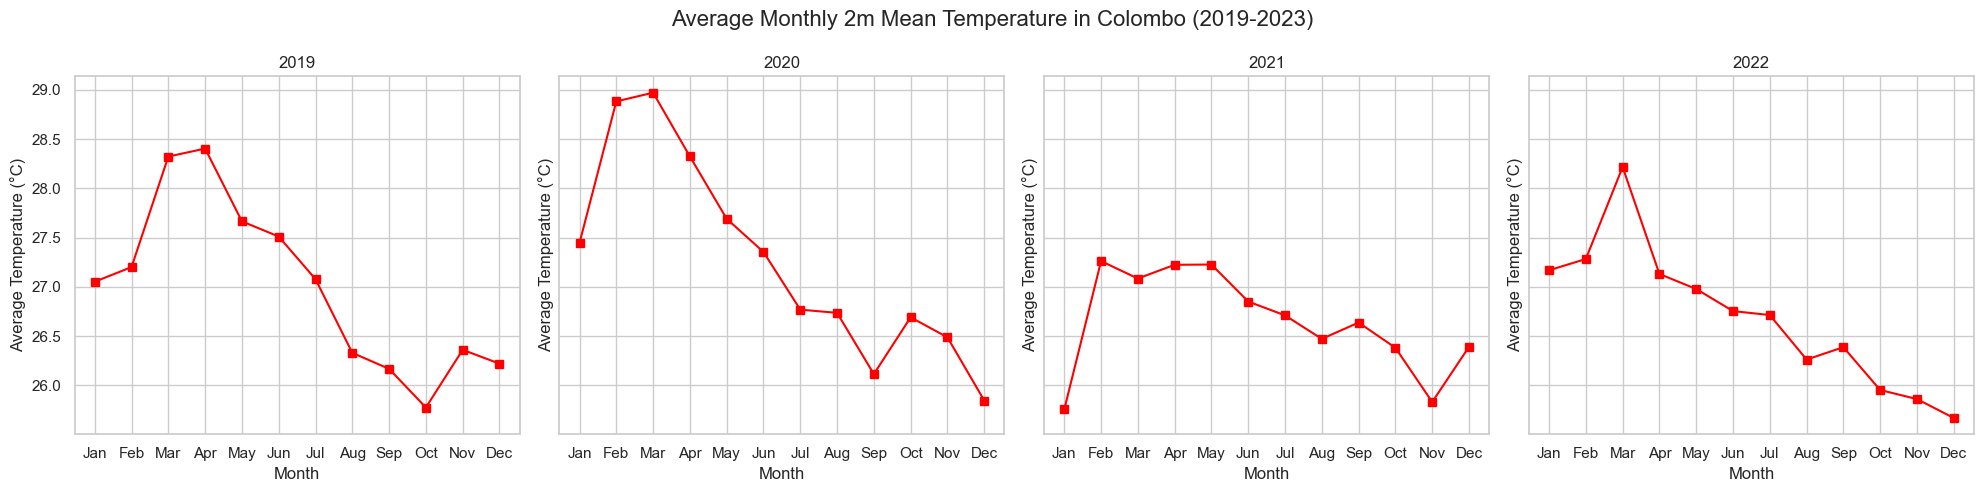

In [190]:
# grid of subplots for each year
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Loop through each year
for i, year in enumerate(range(2019, 2023)):
    # Filter the weather data
    colombo_year = weather_data[(weather_data['city'] == 'Colombo') & (weather_data['year'] == year)]
    
    monthly_avg_temp_2m = colombo_year.groupby('month')['temperature_2m_mean'].mean()
    
    # Plot the data on the corresponding subplot
    axis = axes[i]
    axis.plot(monthly_avg_temp_2m, marker='s', color='red')
    axis.set_title(f'{year}')
    axis.set_xlabel('Month')
    axis.set_ylabel('Average Temperature (°C)')
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
    axis.grid(True)

# Add main title
fig.suptitle('Average Monthly 2m Mean Temperature in Colombo (2019-2023)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

##### Apparent Temperature Changes

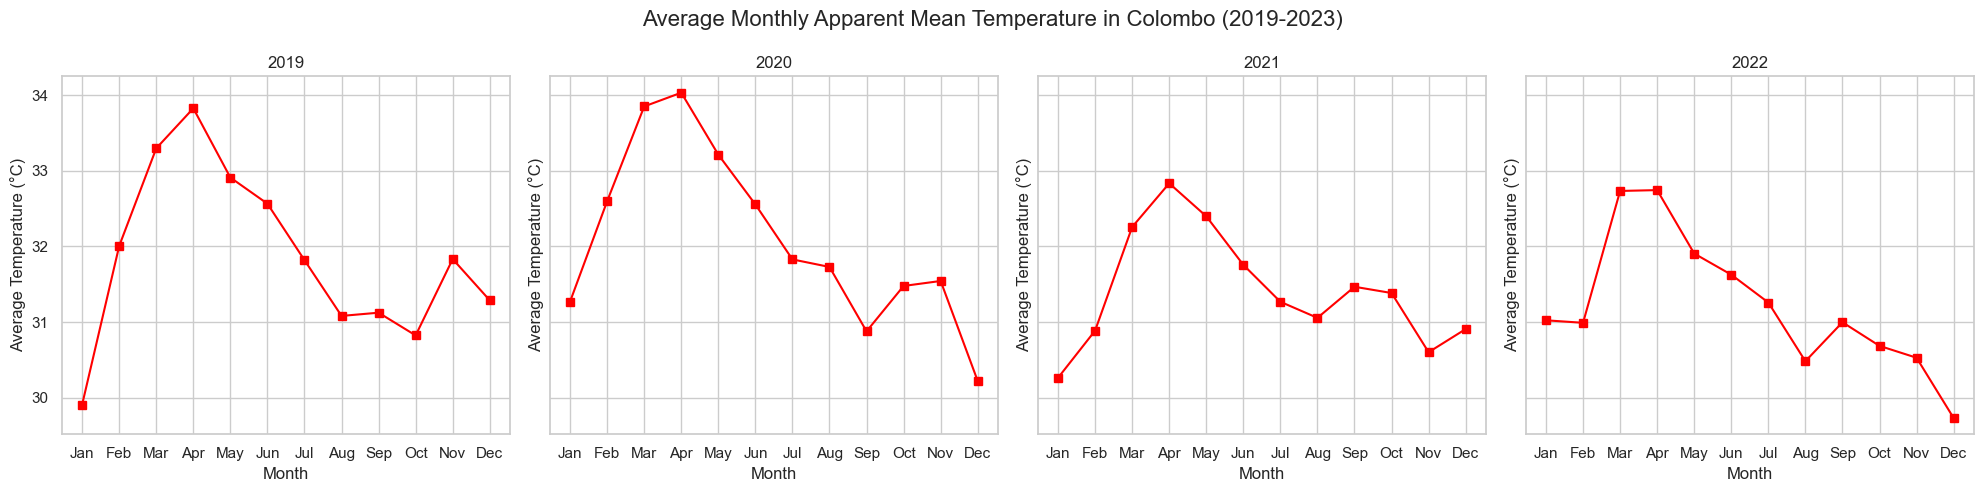

In [191]:
# grid of subplots for each year
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Loop through each year
for i, year in enumerate(range(2019, 2023)):
    # Filter the weather data
    colombo_year = weather_data[(weather_data['city'] == 'Colombo') & (weather_data['year'] == year)]
    
    monthly_avg_temp_apparent = colombo_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Plot the data on the corresponding subplot
    axis = axes[i]
    axis.plot(monthly_avg_temp_apparent, marker='s', color='red')
    axis.set_title(f'{year}')
    axis.set_xlabel('Month')
    axis.set_ylabel('Average Temperature (°C)')
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
    axis.grid(True)

# Add main title
fig.suptitle('Average Monthly Apparent Mean Temperature in Colombo (2019-2023)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

##### Temperature Changes with HCHO Levels

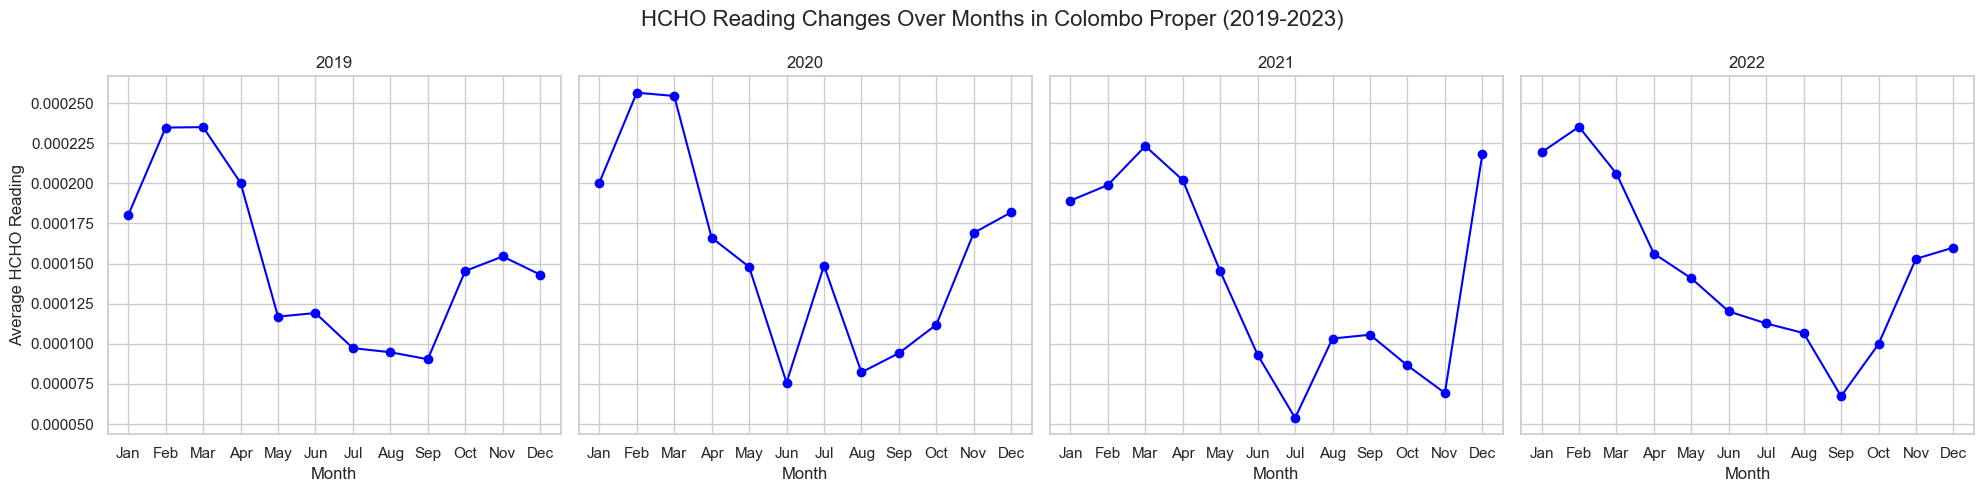

In [192]:
# Create a grid of subplots for each year 
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Loop through each year from 2019 to 2022
for i, year in enumerate(range(2019, 2023)):
    # Filter the HCHO data for the current year and location 'Colombo Proper'
    hcho_year_colombo = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Colombo Proper')]
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = hcho_year_colombo.groupby('Month')['HCHO Reading'].mean()
    
    # Plot the data on the corresponding subplot
    axis = axes[i]
    monthly_means_hcho.plot(marker='o', color='blue', ax=axis)
    axis.set_title(f'{year}')
    axis.set_xlabel('Month')
    axis.set_ylabel('Average HCHO Reading')
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
    axis.grid(True)

# Add main title
fig.suptitle('HCHO Reading Changes Over Months in Colombo Proper (2019-2023)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

##### HCHO Levels with 2m_mean Temperature

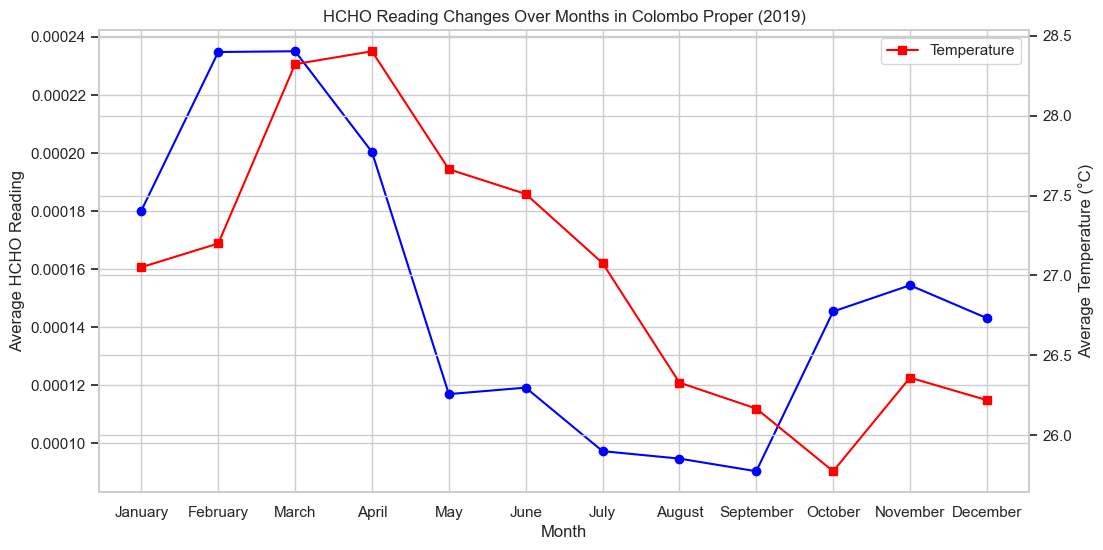

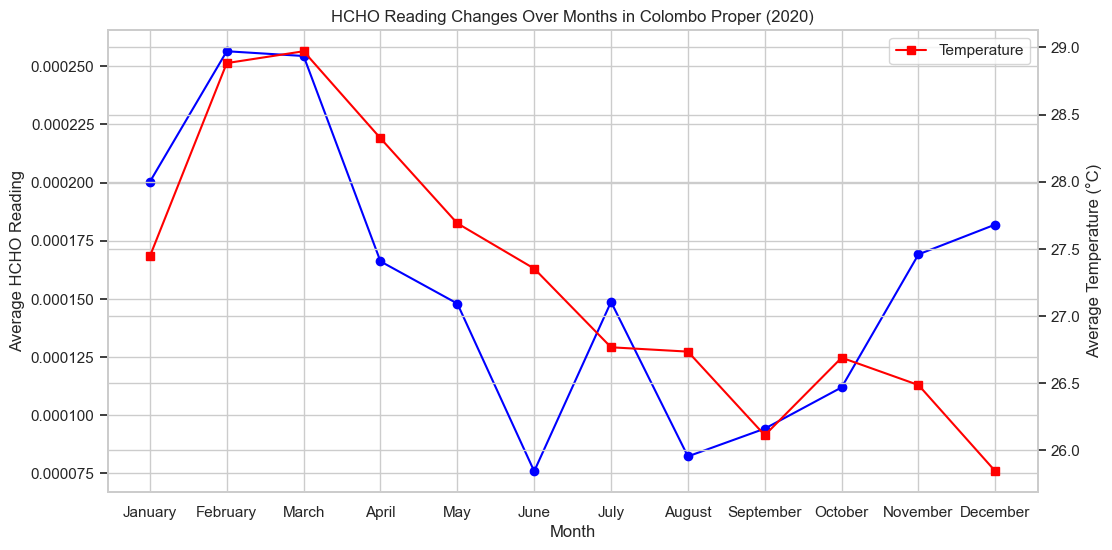

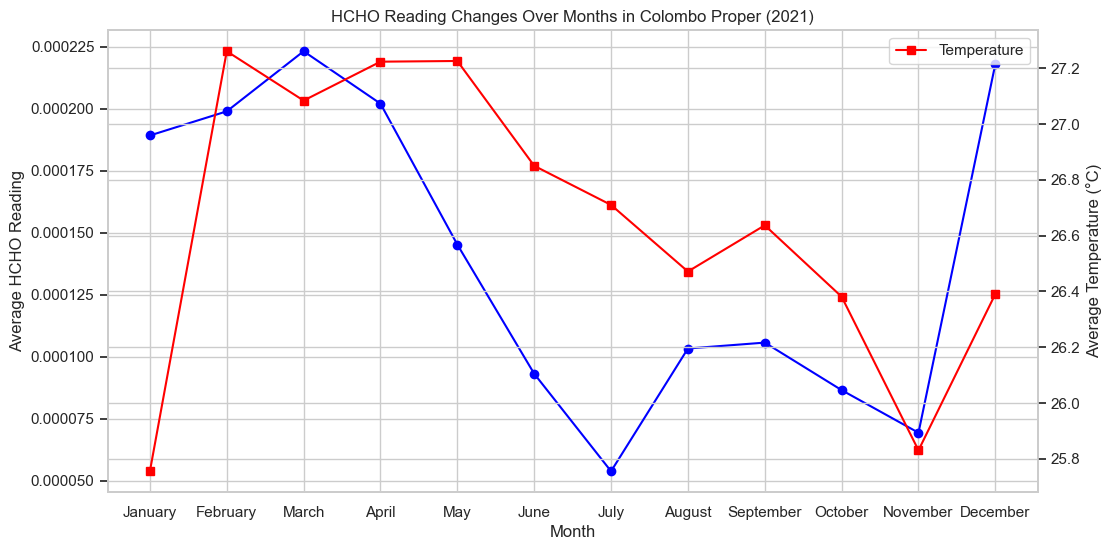

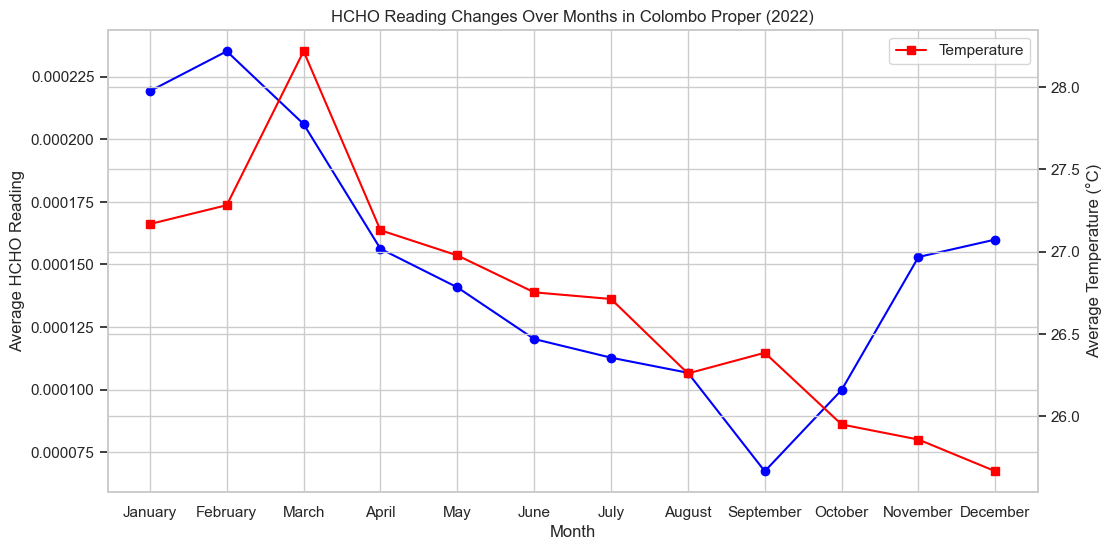

In [193]:
# Loop through each year from 2019 to 2022
for year in range(2019, 2023):
    # Filter the HCHO data for the current year and location 'Colombo Proper'
    hcho_year_colombo = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Colombo Proper')]
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = hcho_year_colombo.groupby('Month')['HCHO Reading'].mean()
    
    # Filter the weather data for the current year and city 'Colombo'
    colombo_year = weather_data[(weather_data['city'] == 'Colombo') & (weather_data['year'] == year)]
    
    # Group by month and calculate the mean temperature for each month
    monthly_avg_temp_2m = colombo_year.groupby('month')['temperature_2m_mean'].mean()
    
    # Create a new plot for the current year
    plt.figure(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    plt.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    plt.xlabel('Month')
    plt.ylabel('Average HCHO Reading')
    plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)])
    plt.title(f'HCHO Reading Changes Over Months in Colombo Proper ({year})')
    
    # Create secondary y-axis for temperature
    plt.twinx()
    plt.plot(monthly_avg_temp_2m, marker='s', color='red', label='Temperature')
    plt.ylabel('Average Temperature (°C)')
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Show grid
    plt.grid(True)
    # Show the plot
    plt.show()


##### HCHO Levels with Appaprent Temperature Mean

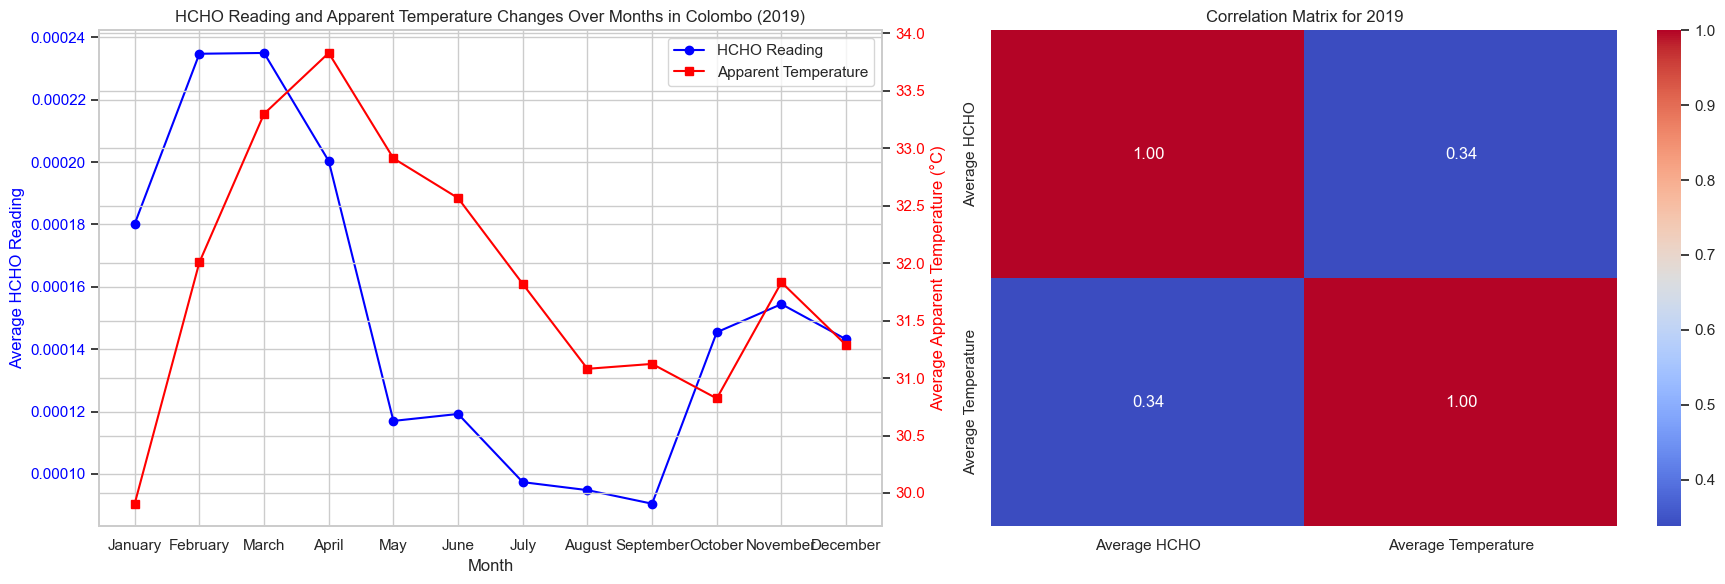

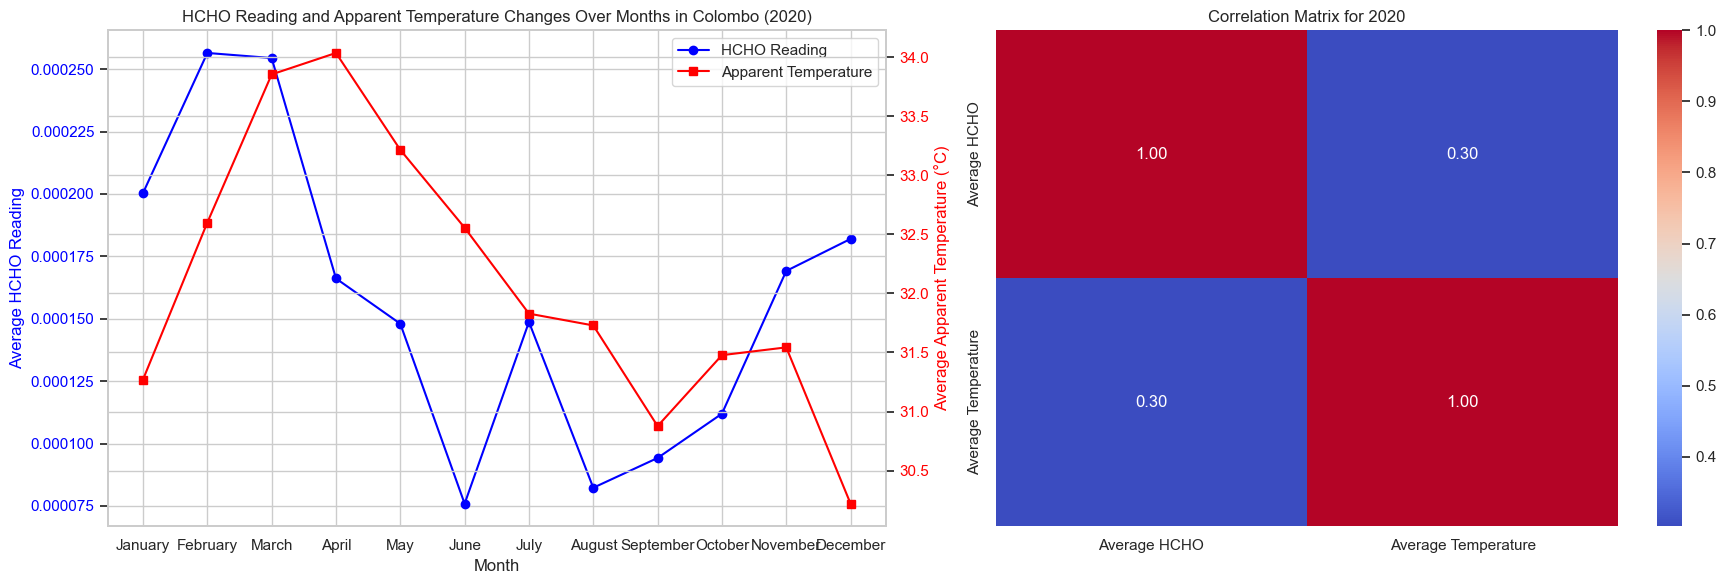

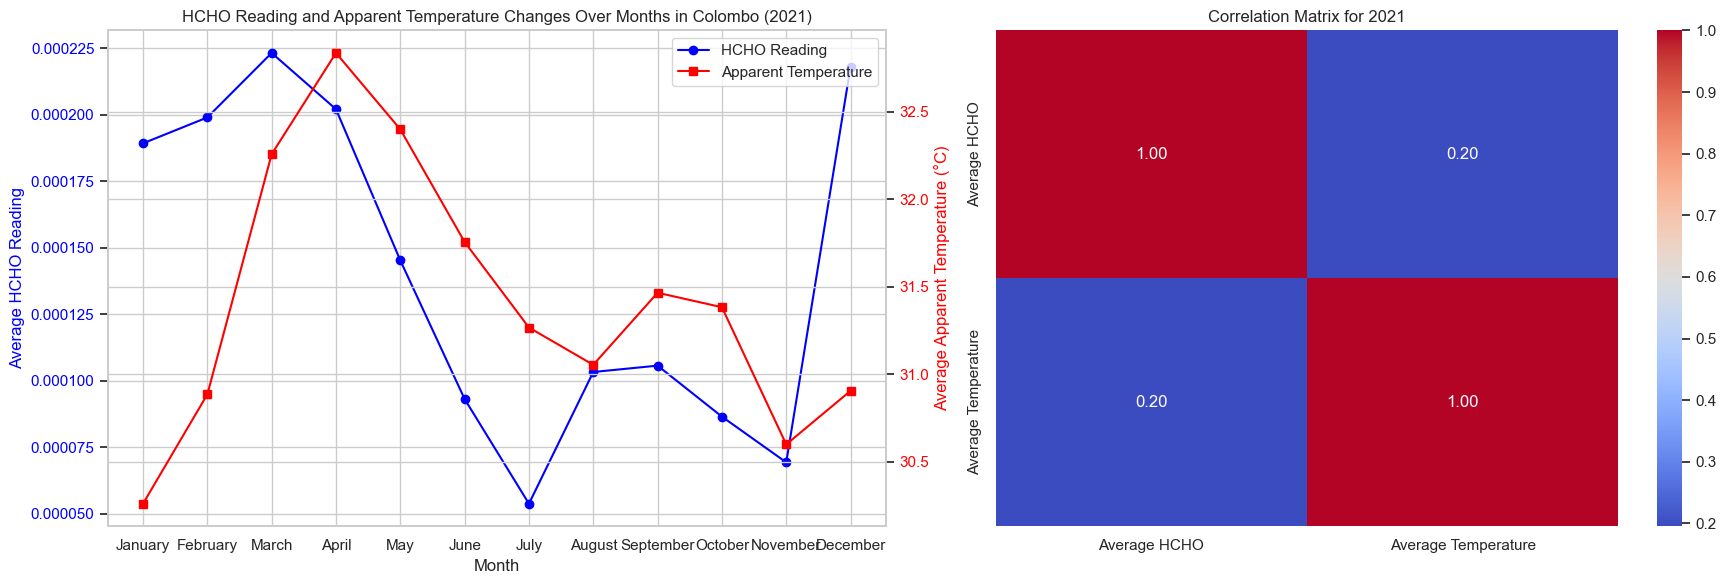

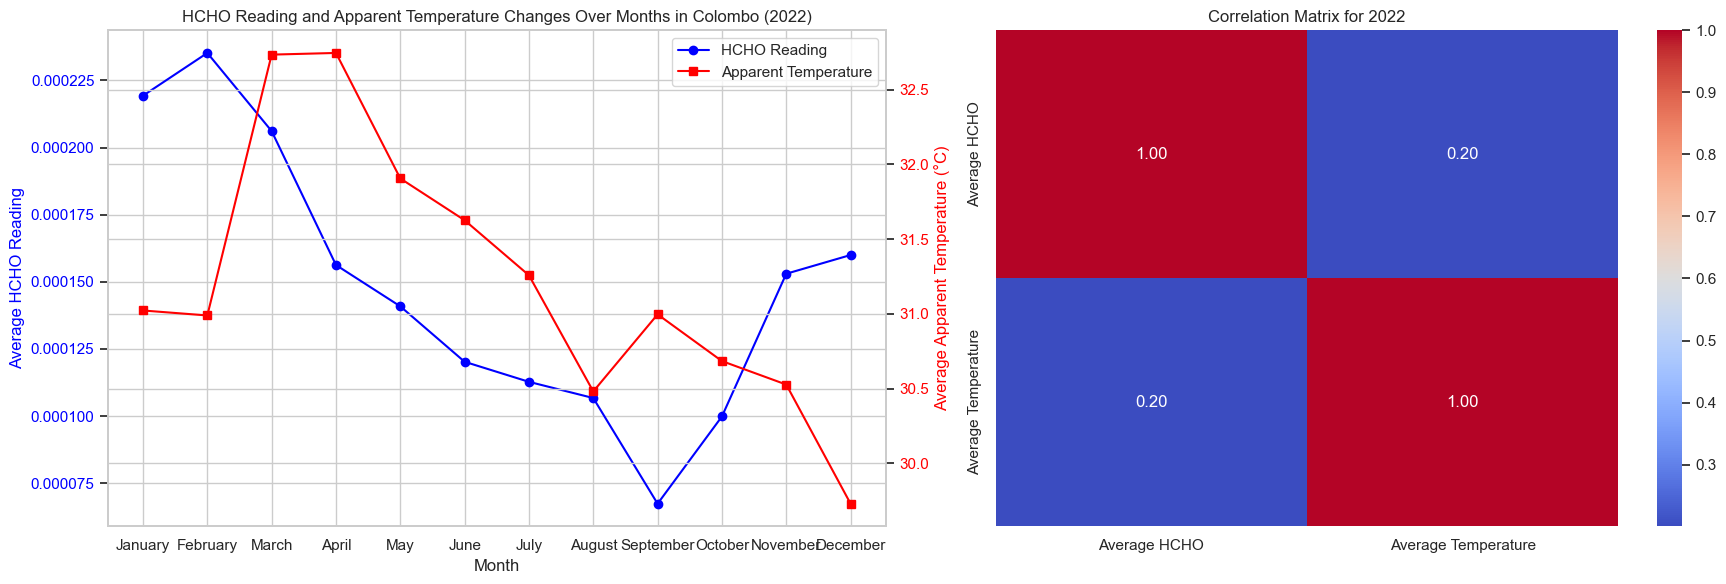

In [194]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Filter the HCHO data for the current year and location 'Colombo Proper'
    hcho_year_colombo = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Colombo Proper')]
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = hcho_year_colombo.groupby('Month')['HCHO Reading'].mean().reset_index()
    
    # Filter the weather data for the current year and city 'Colombo'
    colombo_year = weather_data[(weather_data['city'] == 'Colombo') & (weather_data['year'] == year)]
    
    # Group by month and calculate the mean apparent temperature for each month
    monthly_avg_apparent_temp = colombo_year.groupby('month')['apparent_temperature_mean'].mean().reset_index()
    
    # Merge HCHO and temperature data on month
    combined_data = pd.merge(monthly_means_hcho, monthly_avg_apparent_temp, how='inner', left_on='Month', right_on='month')
    
    # Rename columns for clarity
    combined_data.rename(columns={'HCHO Reading': 'Average HCHO', 'apparent_temperature_mean': 'Average Temperature'}, inplace=True)
    
    # Create a correlation matrix
    correlation_matrix = combined_data[['Average HCHO', 'Average Temperature']].corr()
    
    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 1: HCHO and Temperature
    ax1 = ax[0]
    ax1.plot(combined_data['Month'], combined_data['Average HCHO'], marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(combined_data['Month'], combined_data['Average Temperature'], marker='s', color='red', label='Apparent Temperature')
    ax2.set_ylabel('Average Apparent Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    ax1.set_xticks(combined_data['Month'])
    ax1.set_xticklabels([calendar.month_name[i] for i in combined_data['Month']])
    ax1.set_title(f'HCHO Reading and Apparent Temperature Changes Over Months in Colombo ({year})')
    ax1.grid(True)

    # Plot 2: Correlation Matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax[1])
    ax[1].set_title(f'Correlation Matrix for {year}')
    
    plt.tight_layout()
    plt.show()

As you can see that the increasing of the both 2m and apparent temperature may effects the HCHO Levels in the colombo City. These lines go along and it ensures that.

#### Rain Levels with the Colombo City

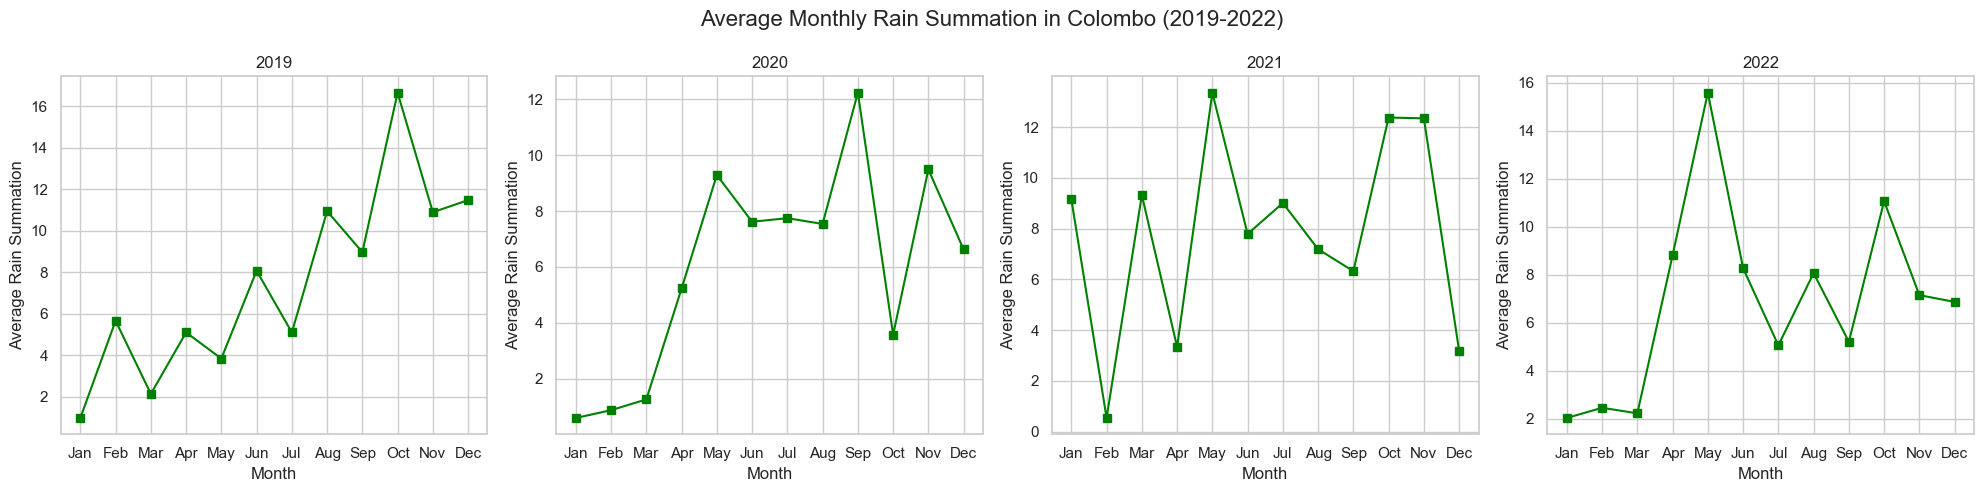

In [195]:
# Create a grid of subplots for each year from 2019 to 2023
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through each year from 2019 to 2023
for i, year in enumerate(range(2019, 2023)):
    # Filter the weather data for the current year and city 'Colombo'
    colombo_year = weather_data[(weather_data['city'] == 'Colombo') & (weather_data['year'] == year)]
    
    # Group by month and calculate the mean rain summation for each month
    monthly_avg_rain_sum = colombo_year.groupby('month')['rain_sum'].mean()
    
    # Plot the average monthly rain summation on the corresponding subplot
    ax = axes[i]
    monthly_avg_rain_sum.plot(marker='s', color='green', ax=ax)
    ax.set_title(f'{year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Rain Summation')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid(True)

# Add main title
fig.suptitle('Average Monthly Rain Summation in Colombo (2019-2022)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


##### Comparison Between rain summations and HCHO Levels in Colombo 2019

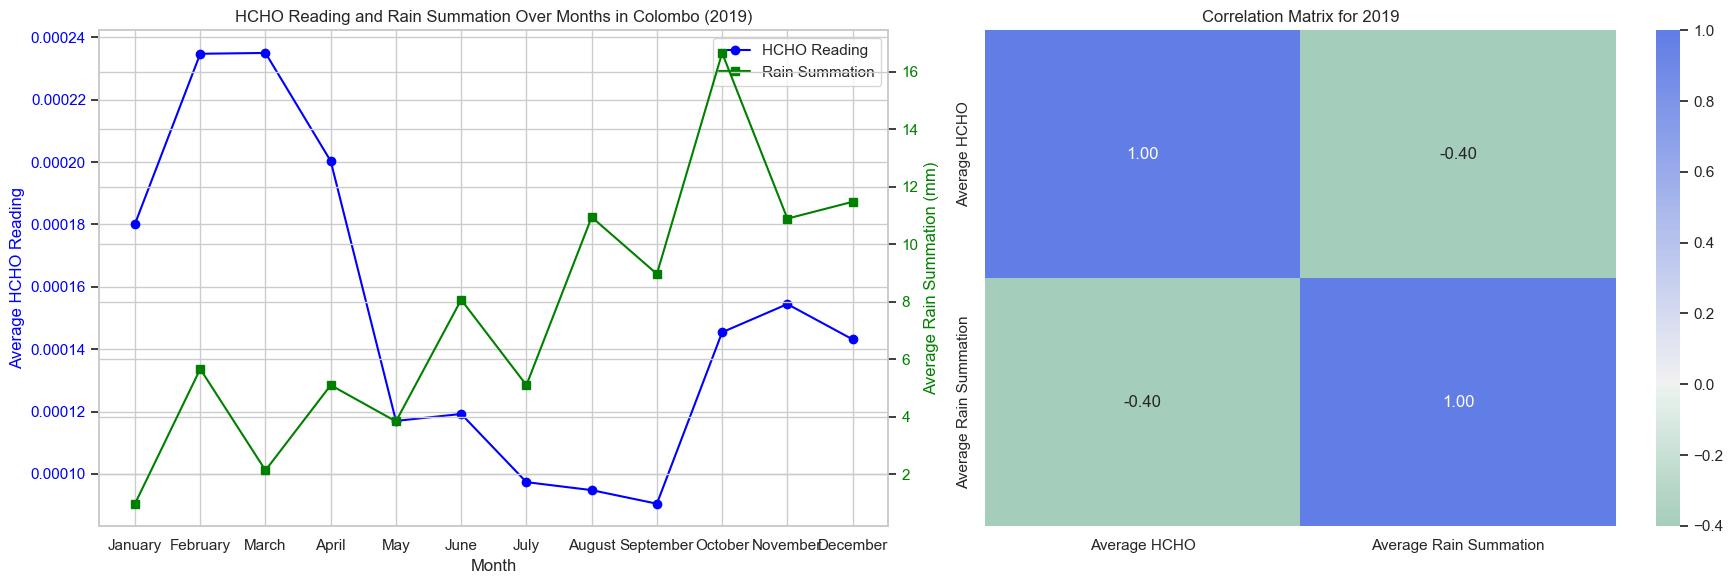

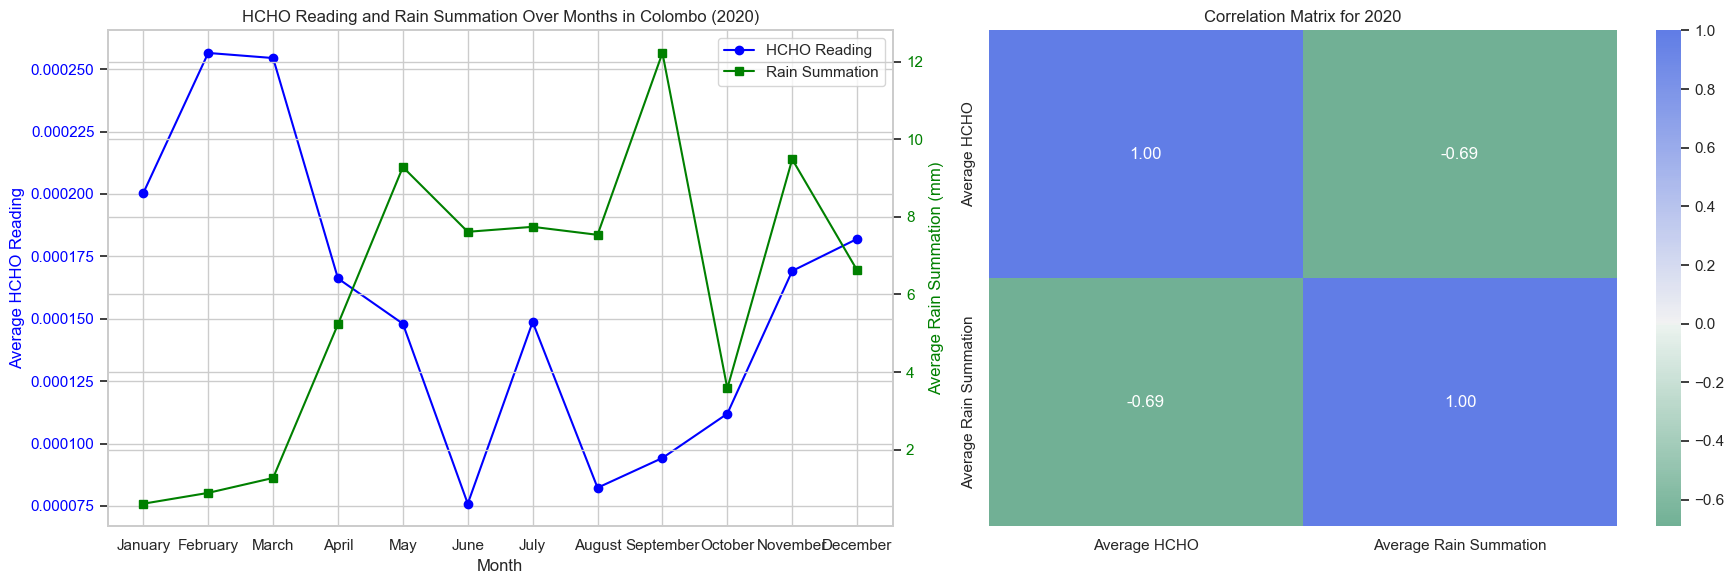

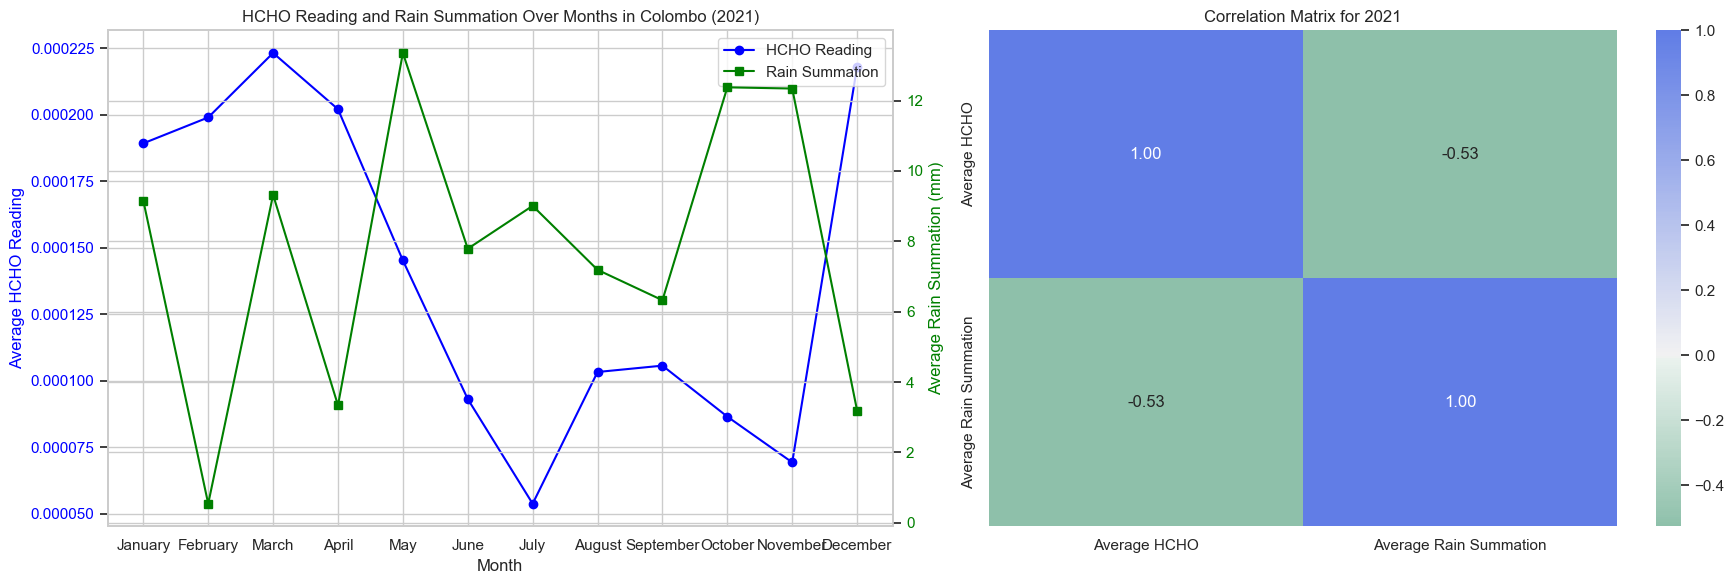

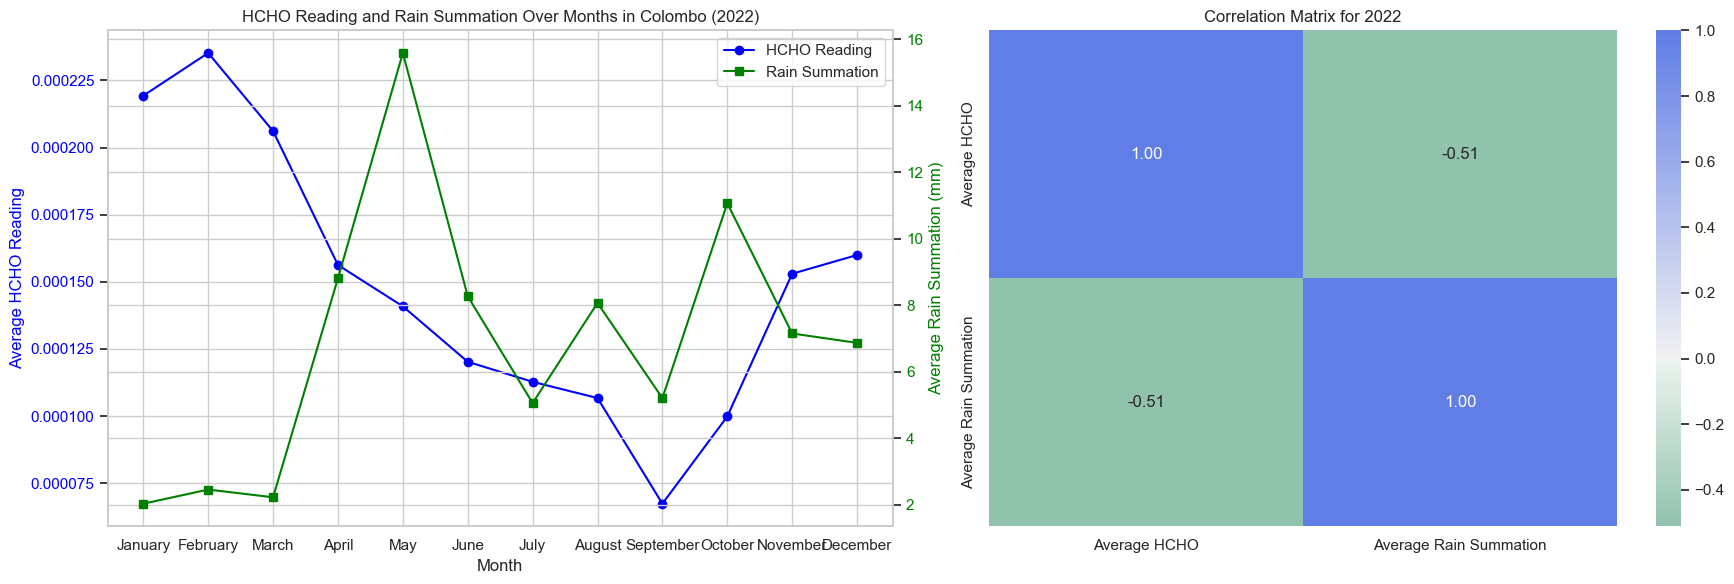

In [196]:
# custom colormap
cmap = sns.diverging_palette(150, 260, s=80, l=55, as_cmap=True)

for year in range(2019, 2023):
    # Filter the HCHO data for the current year and location 'Colombo Proper'
    hcho_year_colombo = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Colombo Proper')]
    monthly_means_hcho = hcho_year_colombo.groupby('Month')['HCHO Reading'].mean().reset_index()
    
    # Filter the weather data for the current year and city
    colombo_year = weather_data[(weather_data['city'] == 'Colombo') & (weather_data['year'] == year)]
    monthly_avg_rain_sum = colombo_year.groupby('month')['rain_sum'].mean().reset_index()
    
    #HCHO and rain summation data on month
    combined_data = pd.merge(monthly_means_hcho, monthly_avg_rain_sum, how='inner', left_on='Month', right_on='month')
    
    # Rename columns for clarity
    combined_data.rename(columns={'HCHO Reading': 'Average HCHO', 'rain_sum': 'Average Rain Summation'}, inplace=True)
    
    # Create a correlation matrix
    correlation_matrix = combined_data[['Average HCHO', 'Average Rain Summation']].corr()
    
    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Plot 1: HCHO and Rain Summation
    ax1 = ax[0]
    ax1.plot(combined_data['Month'], combined_data['Average HCHO'], marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(combined_data['Month'], combined_data['Average Rain Summation'], marker='s', color='green', label='Rain Summation')
    ax2.set_ylabel('Average Rain Summation (mm)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    ax1.set_xticks(combined_data['Month'])
    ax1.set_xticklabels([calendar.month_name[i] for i in combined_data['Month']])
    ax1.set_title(f'HCHO Reading and Rain Summation Over Months in Colombo ({year})')
    ax1.grid(True)

    # Plot 2: Correlation Matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, ax=ax[1], center=0)
    ax[1].set_title(f'Correlation Matrix for {year}')
    
    plt.tight_layout()
    plt.show()

There isn't a necessary pattern between the HCHO levels and the rain summations but we can see that increasing of rainings reduces the HCHO Levels. the correlation matrix proves that there is a strong negative correlation (-0.40 - -0.69) between these two features. Therefore definitely when the rain is higher the HCHO levels are lower. Well according to Monsoon seasons southern monsoon is the season where the HCHO levels are low that season is the rainy season and this graph shows it perfectly. On the other hand, Nothern Monsoon which is a sunny higher temperature season for Colombo and the increasing of the temperature makes sense. 

### Deniyaya, Matara

#### Temperature 2m Changes

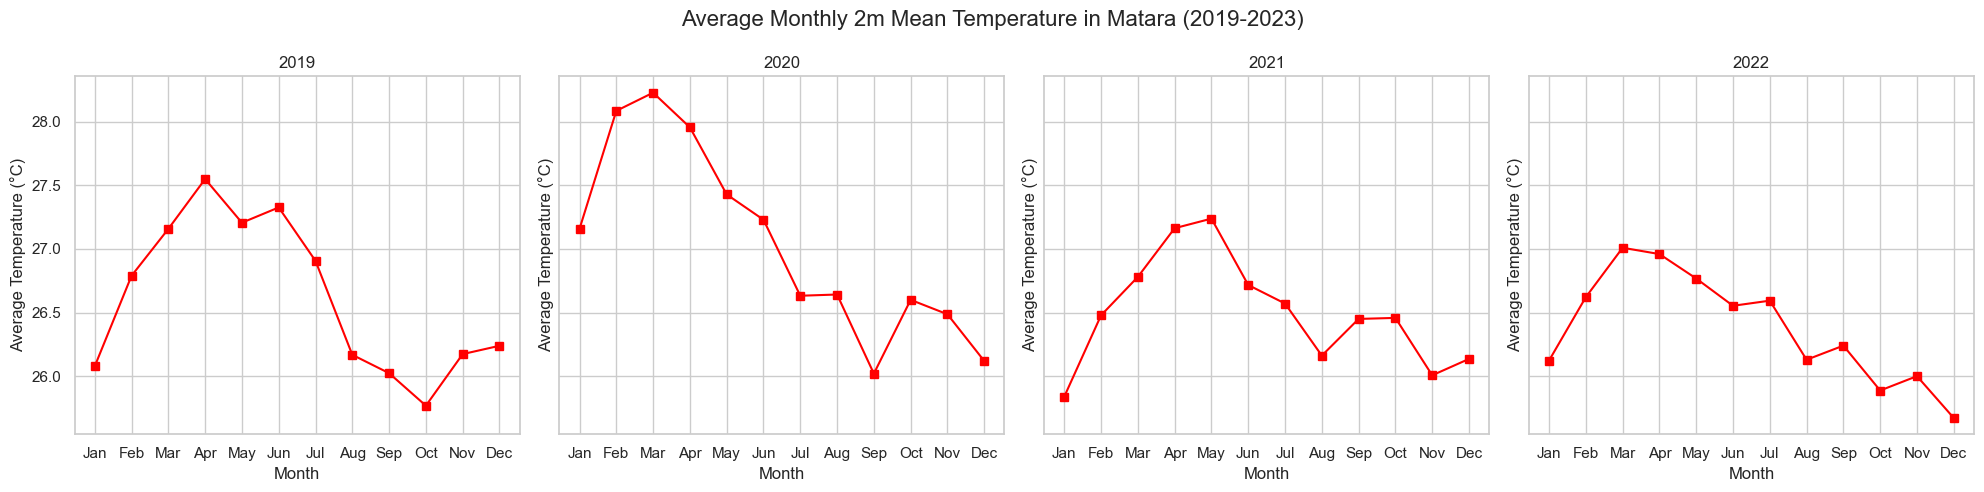

In [197]:
# grid of subplots for each year
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Loop through each year
for i, year in enumerate(range(2019, 2023)):
    # Filter the weather data
    Matara_year = weather_data[(weather_data['city'] == 'Matara') & (weather_data['year'] == year)]
    
    monthly_avg_temp_2m = Matara_year.groupby('month')['temperature_2m_mean'].mean()
    
    # Plot the data on the corresponding subplot
    axis = axes[i]
    axis.plot(monthly_avg_temp_2m, marker='s', color='red')
    axis.set_title(f'{year}')
    axis.set_xlabel('Month')
    axis.set_ylabel('Average Temperature (°C)')
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
    axis.grid(True)

# Add main title
fig.suptitle('Average Monthly 2m Mean Temperature in Matara (2019-2023)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

#### Apparent Temperature Changes

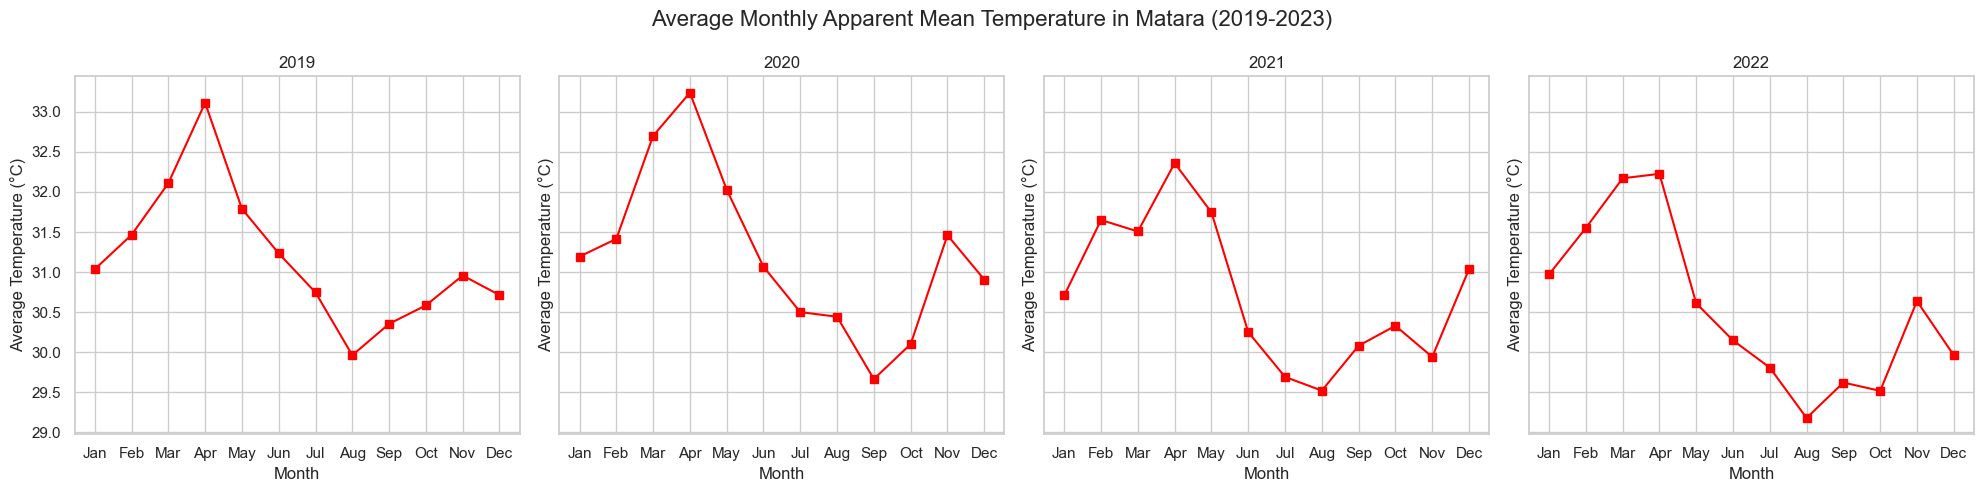

In [198]:
# grid of subplots for each year
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Loop through each year
for i, year in enumerate(range(2019, 2023)):
    # Filter the weather data
    Matara_year = weather_data[(weather_data['city'] == 'Matara') & (weather_data['year'] == year)]
    
    monthly_avg_temp_apparent = Matara_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Plot the data on the corresponding subplot
    axis = axes[i]
    axis.plot(monthly_avg_temp_apparent, marker='s', color='red')
    axis.set_title(f'{year}')
    axis.set_xlabel('Month')
    axis.set_ylabel('Average Temperature (°C)')
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
    axis.grid(True)

# Add main title
fig.suptitle('Average Monthly Apparent Mean Temperature in Matara (2019-2023)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

#### HCHO Level Changes within the years in Matara

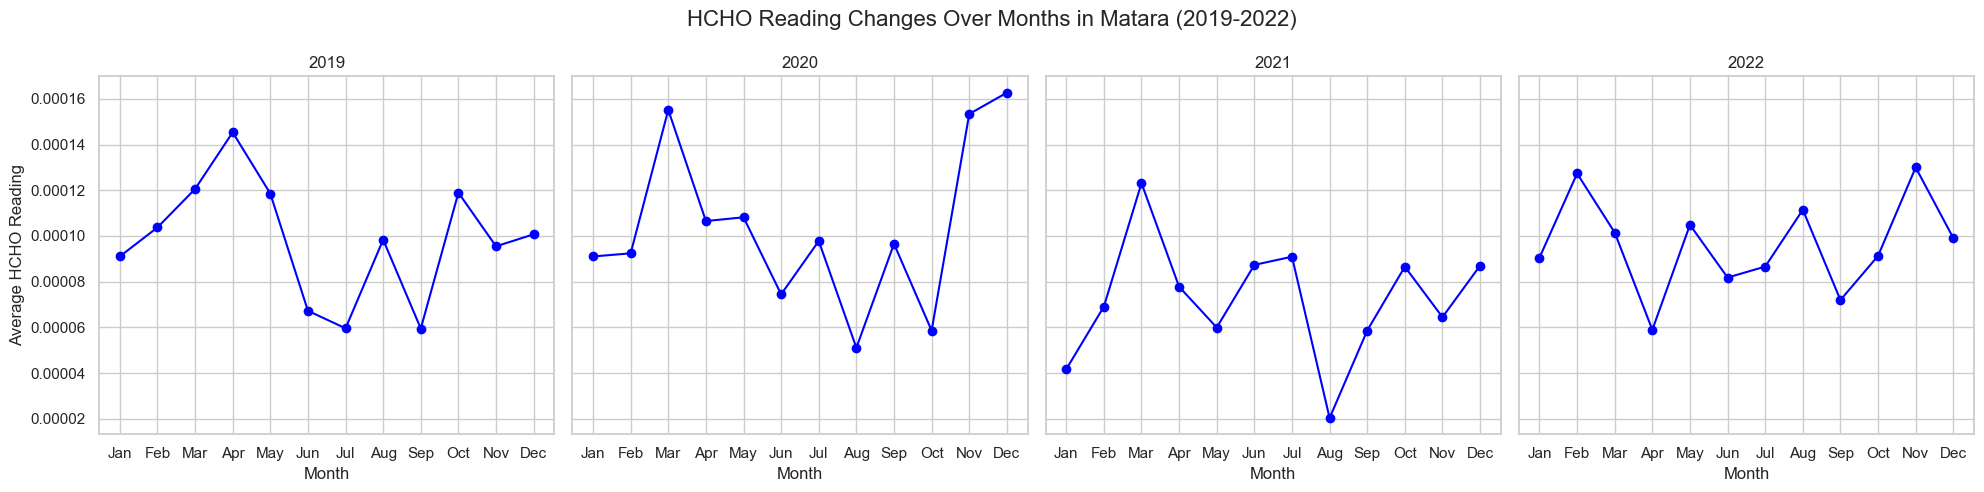

In [199]:
# Create a grid of subplots for each year 
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Loop through each year from 2019 to 2022
for i, year in enumerate(range(2019, 2023)):
    # Filter the HCHO data for the current year and location 'Matara'
    hcho_year_Matara = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Deniyaya, Matara')]
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = hcho_year_Matara.groupby('Month')['HCHO Reading'].mean()
    
    # Plot the data on the corresponding subplot
    axis = axes[i]
    monthly_means_hcho.plot(marker='o', color='blue', ax=axis)
    axis.set_title(f'{year}')
    axis.set_xlabel('Month')
    axis.set_ylabel('Average HCHO Reading')
    axis.set_xticks(range(1, 13))
    axis.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
    axis.grid(True)

# Add main title
fig.suptitle('HCHO Reading Changes Over Months in Matara (2019-2022)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

#### HCHO Level Changes with Temperature 2m in Matara

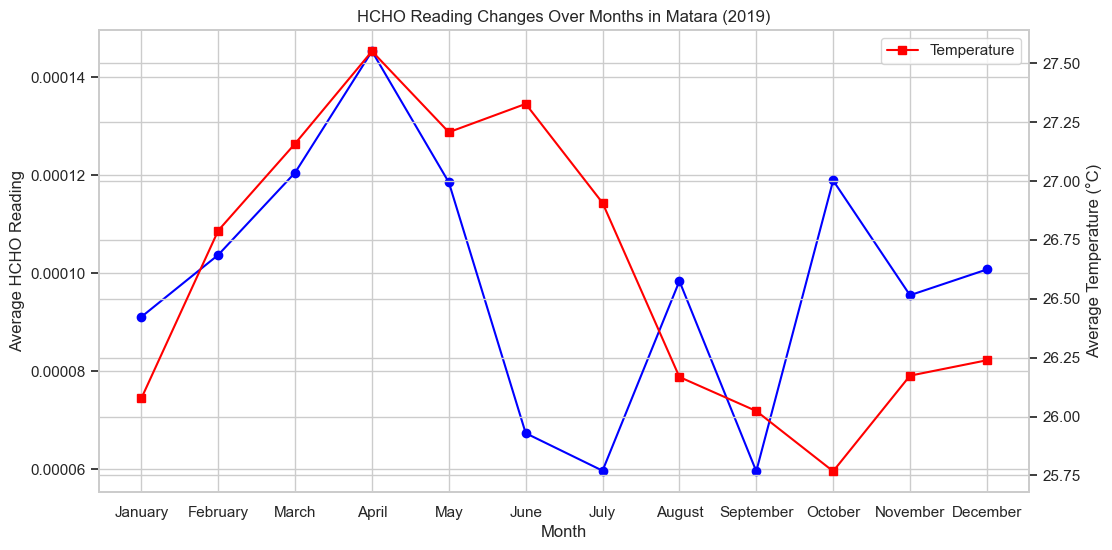

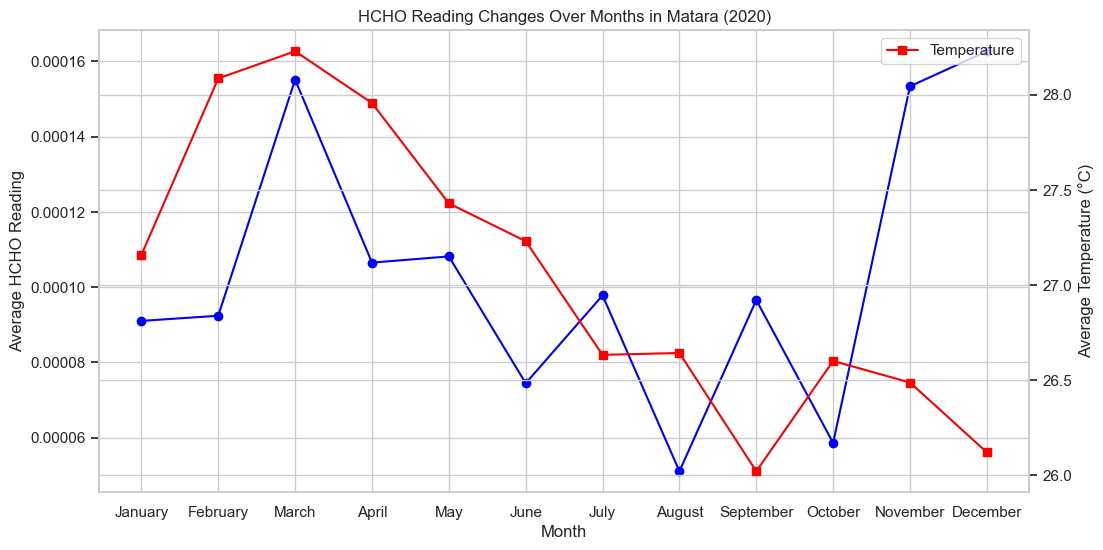

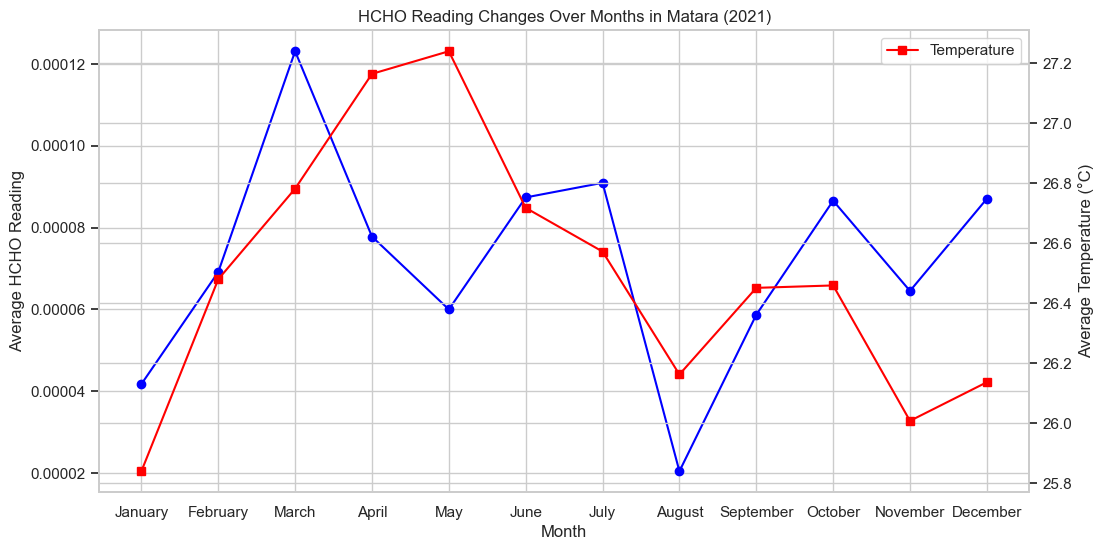

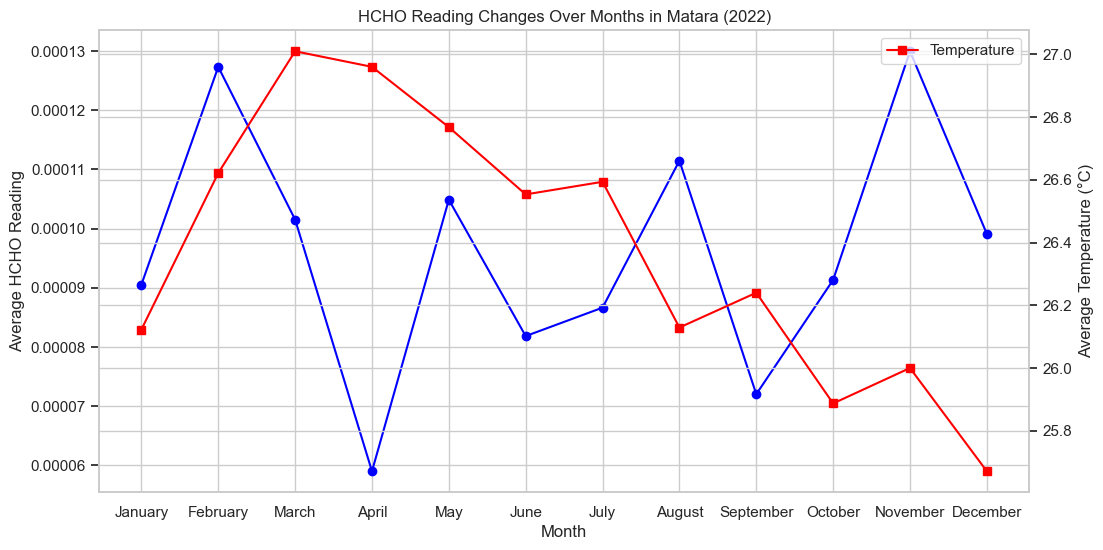

In [200]:
# Loop through each year from 2019 to 2022
for year in range(2019, 2023):
    # Filter the HCHO data for the current year and location 'Matara'
    hcho_year_matara = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Deniyaya, Matara')]
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = hcho_year_matara.groupby('Month')['HCHO Reading'].mean()
    
    # Filter the weather data for the current year and city 'Matara'
    matara_year = weather_data[(weather_data['city'] == 'Matara') & (weather_data['year'] == year)]
    
    # Group by month and calculate the mean temperature for each month
    monthly_avg_temp_2m = matara_year.groupby('month')['temperature_2m_mean'].mean()
    
    # Create a new plot for the current year
    plt.figure(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    plt.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    plt.xlabel('Month')
    plt.ylabel('Average HCHO Reading')
    plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)])
    plt.title(f'HCHO Reading Changes Over Months in Matara ({year})')
    
    # Create secondary y-axis for temperature
    plt.twinx()
    plt.plot(monthly_avg_temp_2m, marker='s', color='red', label='Temperature')
    plt.ylabel('Average Temperature (°C)')
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Show grid
    plt.grid(True)
    # Show the plot
    plt.show()

##### HCHO Levels with Appaprent Temperature Mean

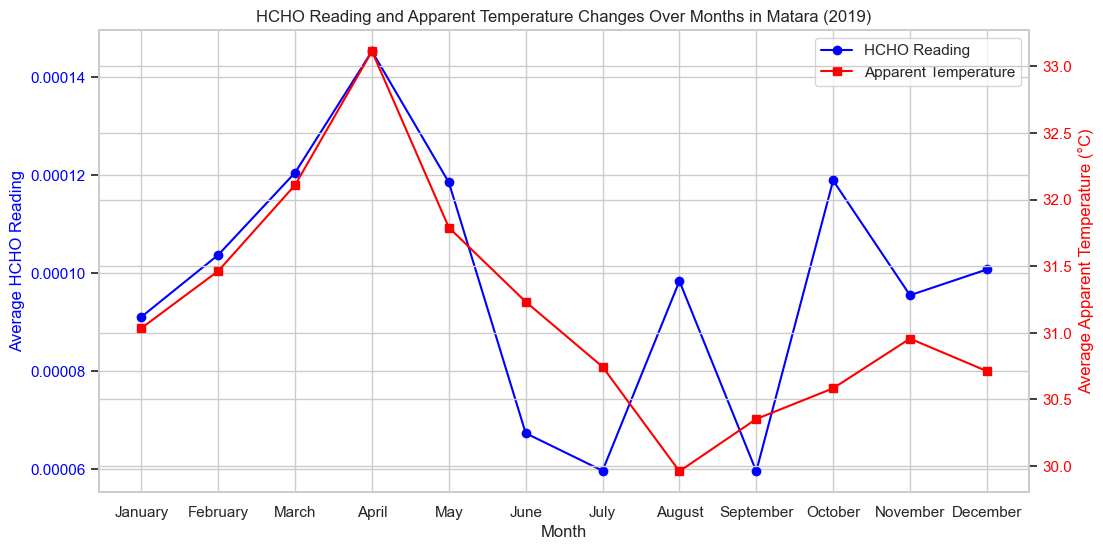

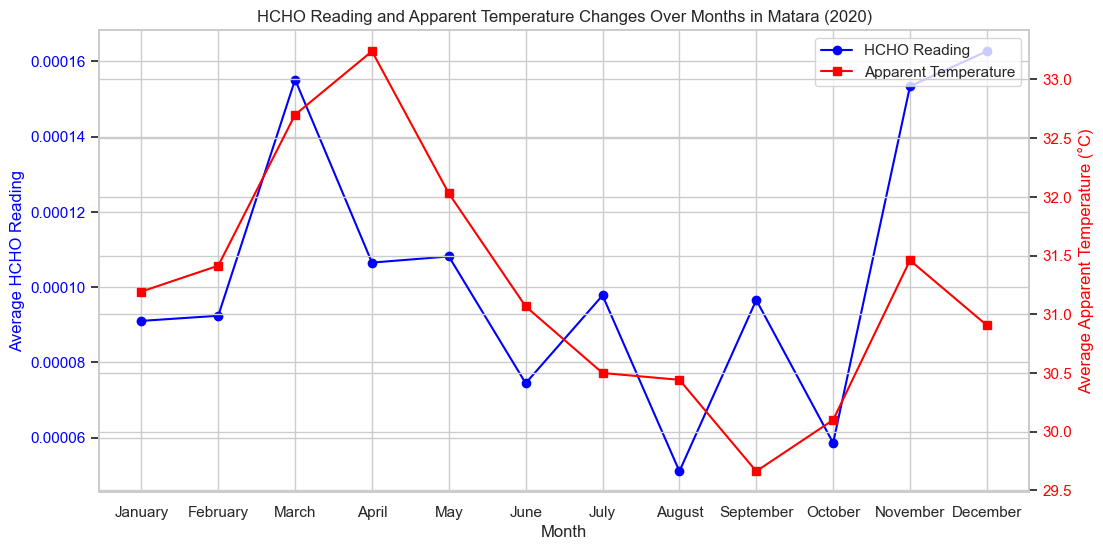

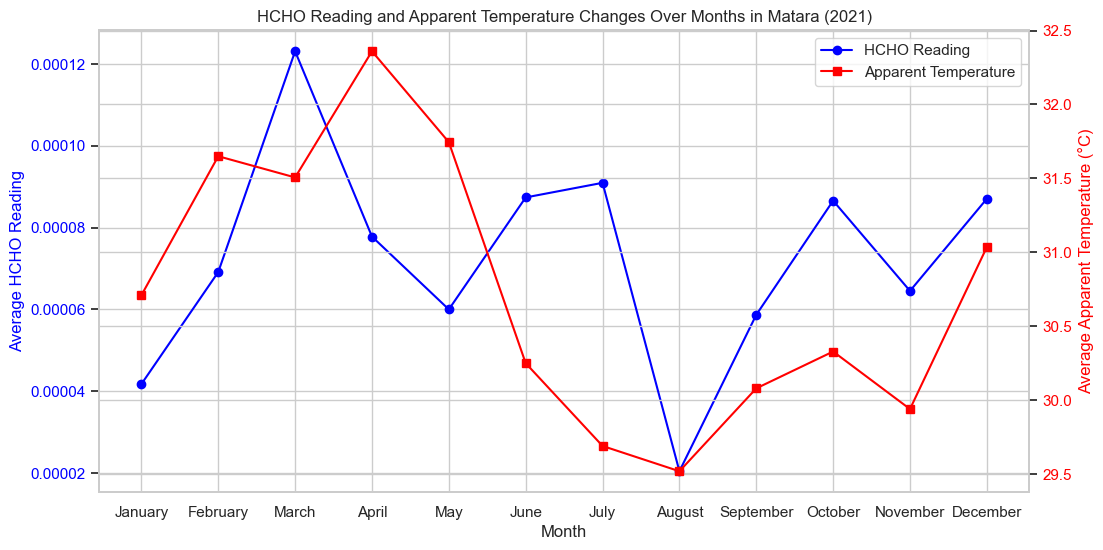

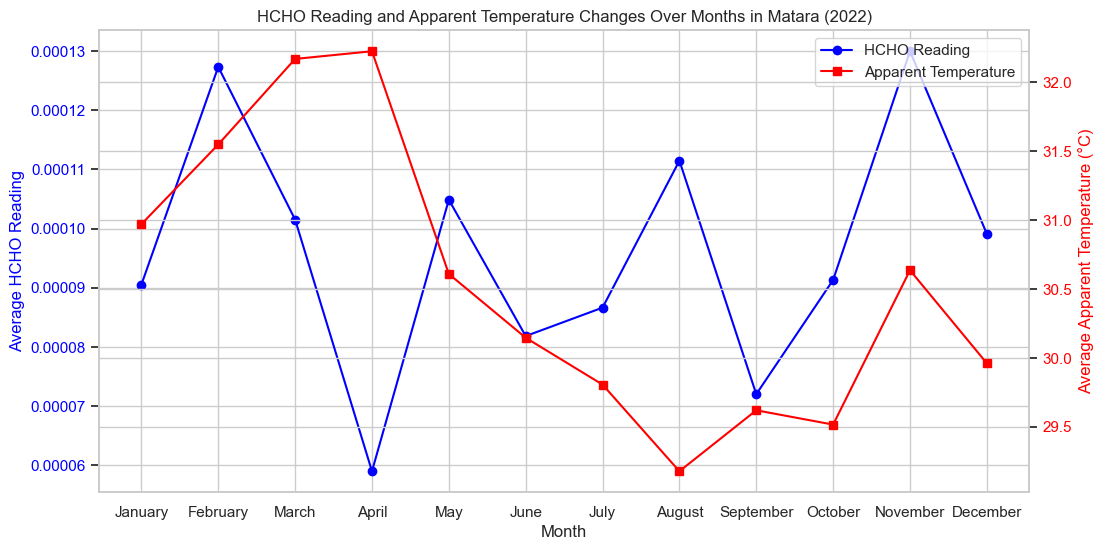

In [201]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Filter the HCHO data for the current year and location 'Matara'
    hcho_year_matara = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Deniyaya, Matara')]
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = hcho_year_matara.groupby('Month')['HCHO Reading'].mean()
    
    # Filter the weather data for the current year and city 'Colombo'
    matara_year = weather_data[(weather_data['city'] == 'Matara') & (weather_data['year'] == year)]
    
    # Group by month and calculate the mean apparent temperature for each month
    monthly_avg_apparent_temp = matara_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Create a new plot for the current year
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for apparent temperature
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_apparent_temp, marker='s', color='red', label='Apparent Temperature')
    ax2.set_ylabel('Average Apparent Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])
    
    plt.title(f'HCHO Reading and Apparent Temperature Changes Over Months in Matara ({year})')
    plt.grid(True)
    plt.show()


Again It occurs that how temperature affects the HCHO Levels in Sri Lanka. Higher Temperature means higher HCHO levles. it confirmed by two cities Matara and Colombo.

#### Rain Summations over the years in Matara

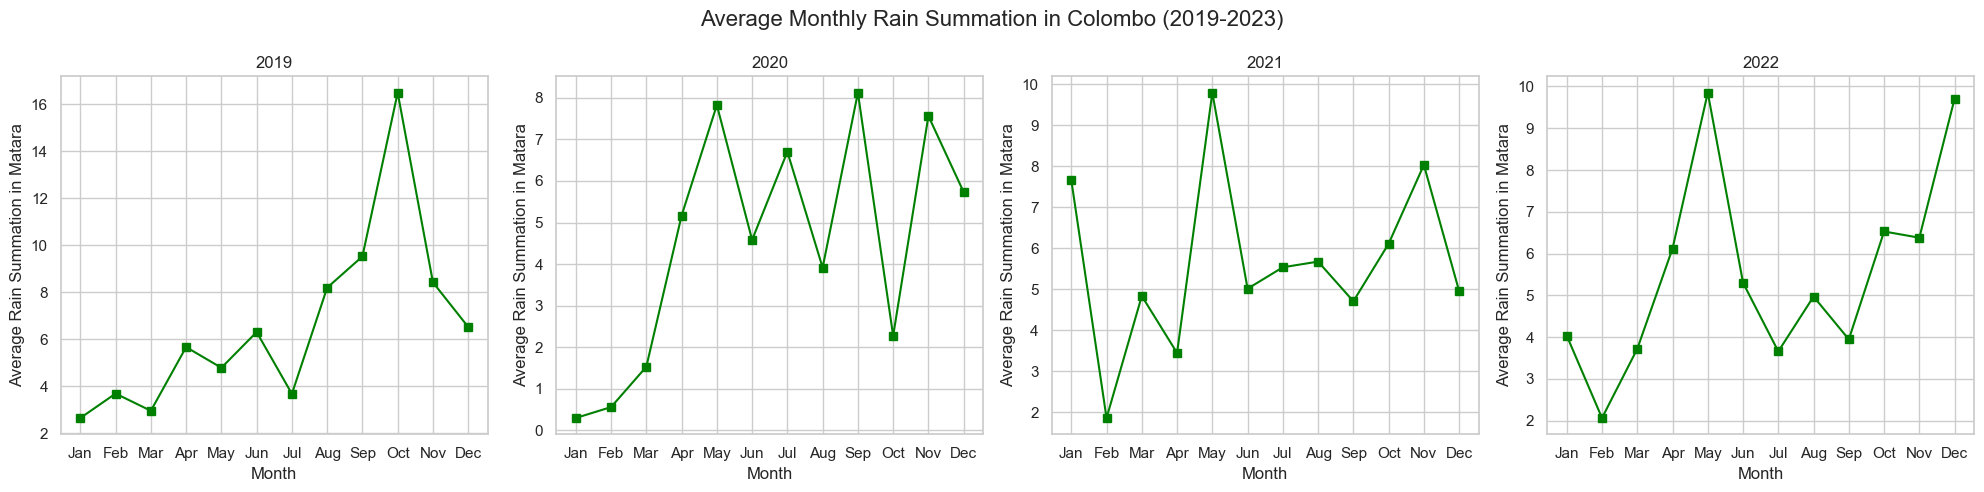

In [202]:
# Create a grid of subplots for each year from 2019 to 2023
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through each year from 2019 to 2023
for i, year in enumerate(range(2019, 2023)):
    # Filter the weather data for the current year and city 'Colombo'
    matara_year = weather_data[(weather_data['city'] == 'Matara') & (weather_data['year'] == year)]
    
    # Group by month and calculate the mean rain summation for each month
    monthly_avg_rain_sum = matara_year.groupby('month')['rain_sum'].mean()
    
    # Plot the average monthly rain summation on the corresponding subplot
    ax = axes[i]
    monthly_avg_rain_sum.plot(marker='s', color='green', ax=ax)
    ax.set_title(f'{year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Rain Summation in Matara')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.grid(True)

# Add main title
fig.suptitle('Average Monthly Rain Summation in Colombo (2019-2023)', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


#### Rain Summations within HCHO Levels

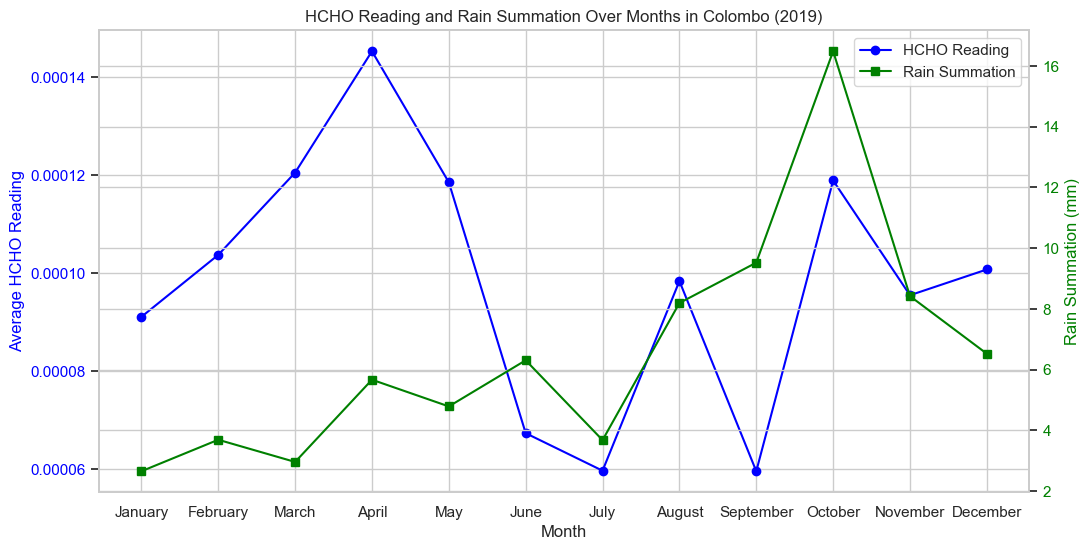

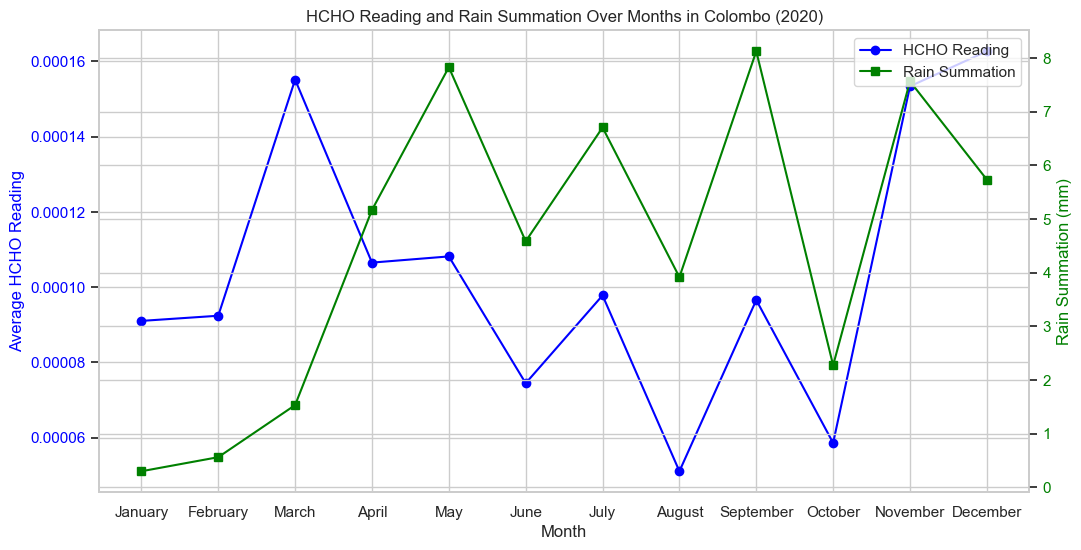

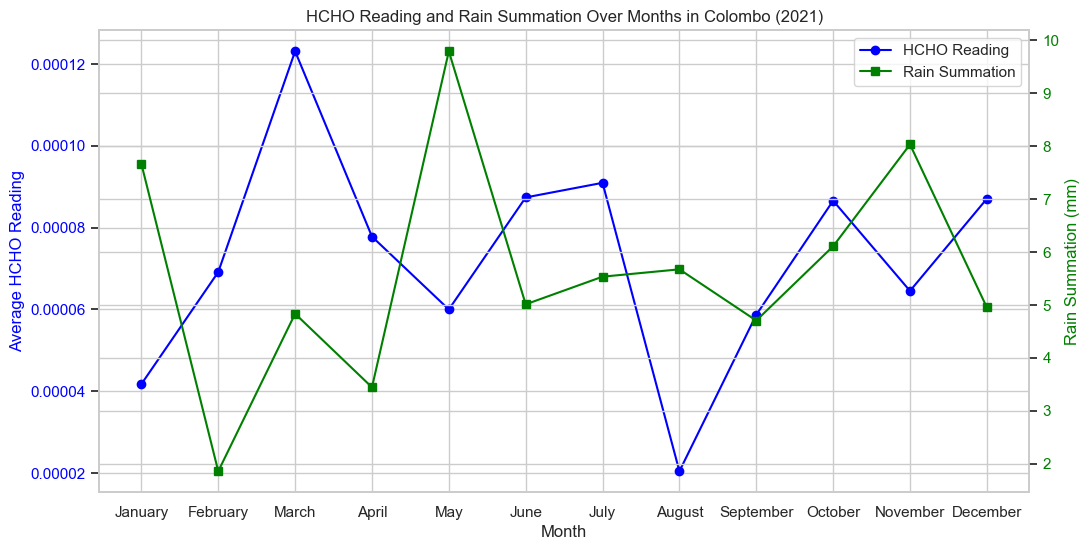

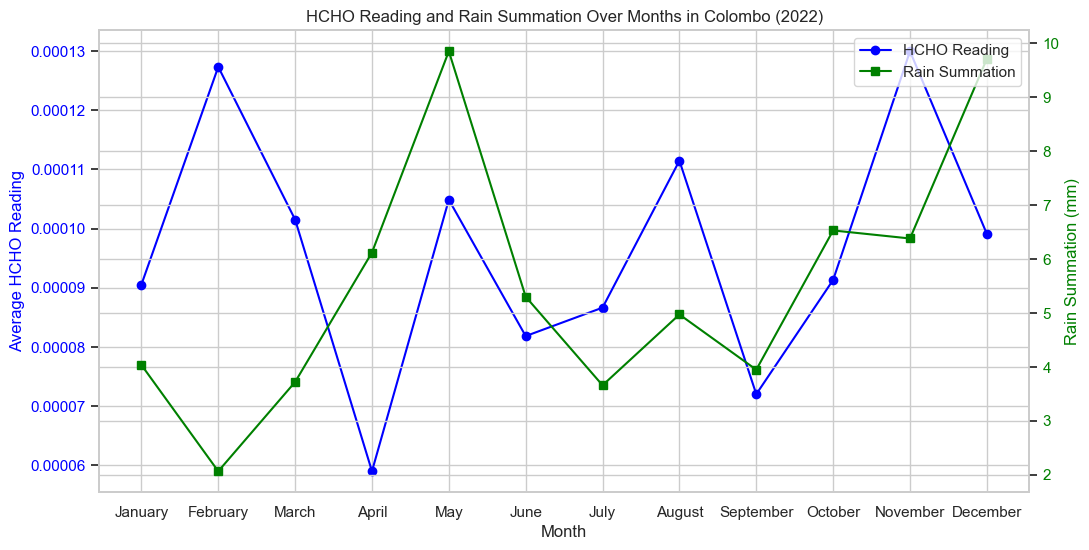

In [203]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Filter HCHO data for the specific year and location
    HCHO_year = HCHO_data[(HCHO_data['Year'] == year) & (HCHO_data['Location'] == 'Deniyaya, Matara')]
    # Calculate monthly mean HCHO readings
    monthly_means = HCHO_year.groupby('Month')['HCHO Reading'].mean()

    # Filter weather data for the specific year and city
    weather_year = weather_data[(weather_data['city'] == 'Matara') & (weather_data['year'] == year)]
    # Calculate monthly average rain summation
    monthly_avg_rain_sum = weather_year.groupby('month')['rain_sum'].mean()

    # Create plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means.index, monthly_means.values, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for rain summation
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_rain_sum.index, monthly_avg_rain_sum.values, marker='s', color='green', label='Rain Summation')
    ax2.set_ylabel('Rain Summation (mm)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])

    # Title and grid
    plt.title(f'HCHO Reading and Rain Summation Over Months in Colombo ({year})')
    plt.grid(True)

    # Show plot
    plt.show()


Well Same as previous in this city too. Because you can see that in Higher rain summation months the HCHO Levels getting lower because of the total Temperature Getting Lower. In conclusion we can consider one factor as affecting HCHO Levels. it Is __Temperature__.

## Cultural Seasons In Sri Lanka and Comparison with HCHO Levels

Sri Lanka is a country full with cultural Diversity. Therefore everymonth there is a cultural speciality in Sri Lanka for all to the nations. Therefore let's categorize some months based on Cultural festivals. But in this we mainly focus on Sinhala and Tamil new year and vesak poya festivals which are included in lot of unique human resource activities which may cause the risings of HCHO Levels. Also Let's take year 2019 and 2023 because other years may affects the data due to covid lockdowns.

1. Sinhala and Tamil New Year - April
2. Vesak Poya Festival - May

### 2019 April Month HCHO Levels Comparison to other Months

### Bar Graph 2019 HCHO Levels

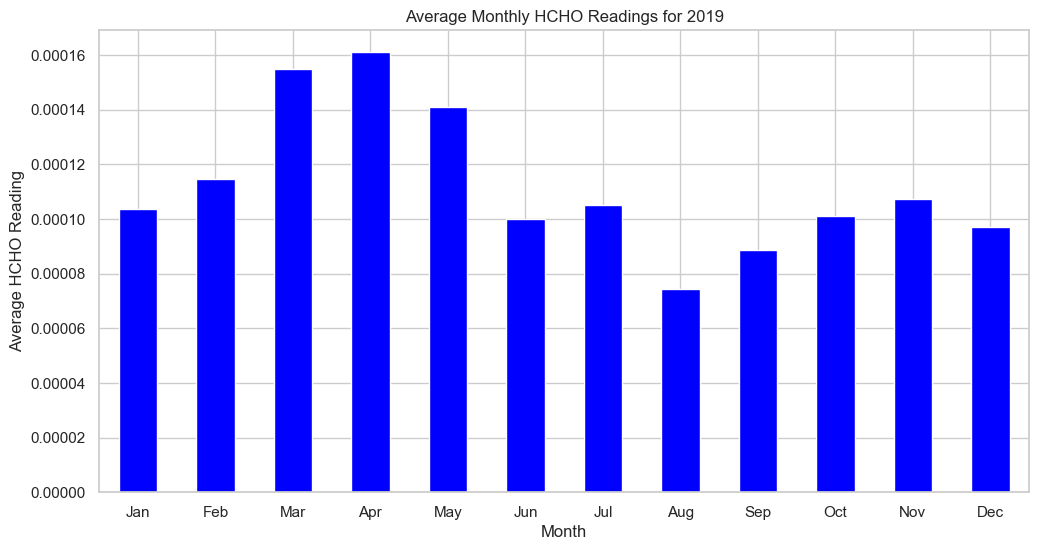

In [204]:
# Relevant Data
hny_2019 = HCHO_data[HCHO_data['Year'] == 2019]

month_hny_data = hny_2019.groupby('Month')['HCHO Reading'].mean()

# Plotting
plt.figure(figsize=(12, 6))
month_hny_data.plot(kind='bar', color='blue') 
plt.title('Average Monthly HCHO Readings for 2019')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=0)
plt.show()


### Bar Graph 2023 HCHO Levels

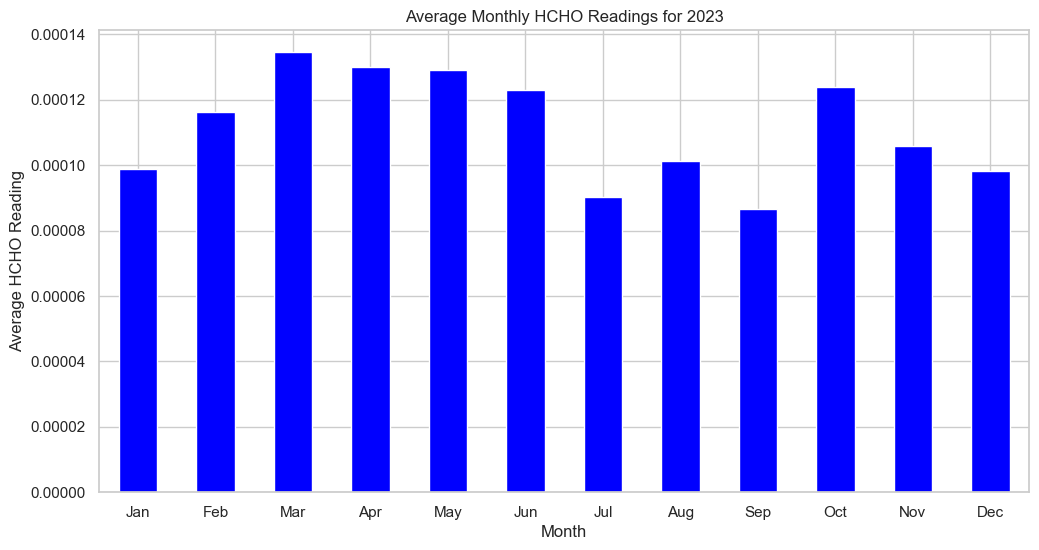

In [205]:
# Relevant Data
hny_2019 = HCHO_data[HCHO_data['Year'] == 2023]

month_hny_data = hny_2019.groupby('Month')['HCHO Reading'].mean()

# Plotting
plt.figure(figsize=(12, 6))
month_hny_data.plot(kind='bar', color='blue') 
plt.title('Average Monthly HCHO Readings for 2023')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=0)
plt.show()


Well again we can see beside's the temperature factor cultural seasons also may impact the HCHO Levels. On Sinhala and Tamil New Year lots of people go to their home villages in order to spend the new year with their families it also a quite reason to increase of HCHO Levels. Considering these two graphs we can see that these cultural seasons have a quite impact on the HCHO Levels.

## Comparison of HCHO Levels between Urban and Rural Citiies 

This is a collection of city comparison based on different parameters that differ cities from urban to Rural.

1. Urban Cities - Colombo, Kandy, Jaffna
2. Rural Cities - Monaragala,Kurunegala, Nuwara Eliya

In [206]:
for location in HCHO_data['Location'].unique():
    print(location)

Colombo Proper
Deniyaya, Matara
Nuwara Eliya Proper
Kandy Proper
Bibile, Monaragala
Kurunegala Proper
Jaffna Proper


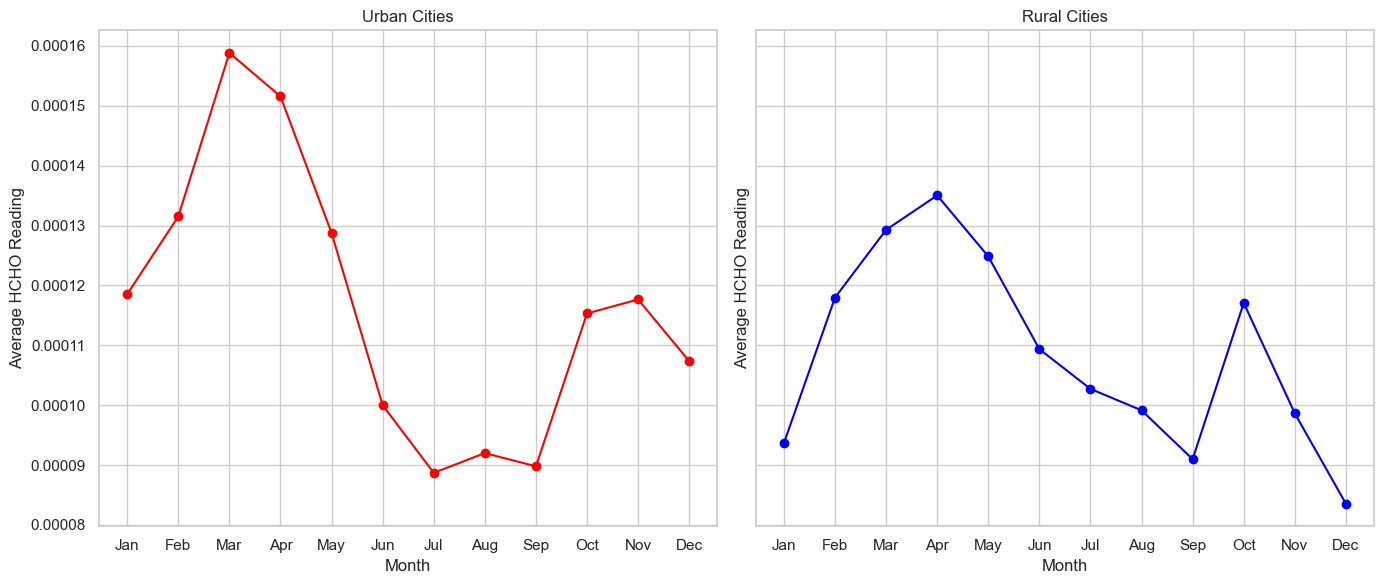

In [207]:
# Dividing it to two categories.
urban_cities = HCHO_data[HCHO_data['Location'].isin(['Colombo Proper','Kandy Proper','Jaffna Proper'])]
rural_cities = HCHO_data[HCHO_data['Location'].isin(['Bibile, Monaragala','Kurunegala Proper','Nuwara Eliya Proper'])]

# HCHO Level Means
rural_monthly_means = rural_cities.groupby('Month')['HCHO Reading'].mean()
urban_monthly_means = urban_cities.groupby('Month')['HCHO Reading'].mean()

# Plotting in subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting for rural cities
axes[1].plot(rural_monthly_means, marker='o', color='blue')
axes[1].set_title('Rural Cities')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average HCHO Reading')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
axes[1].grid(True)

# Plotting for urban cities
axes[0].plot(urban_monthly_means, marker='o', color='red')
axes[0].set_title('Urban Cities')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average HCHO Reading')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])
axes[0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

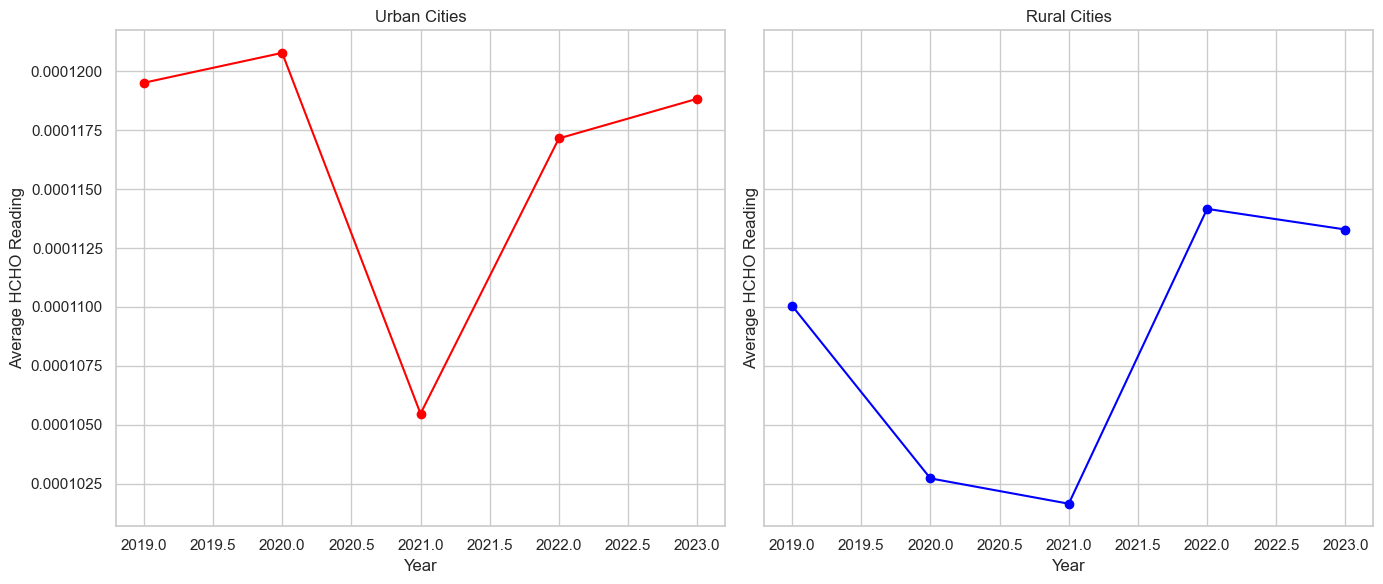

In [208]:
# Grouping by Year for both urban and rural cities
rural_yearly_means = rural_cities.groupby('Year')['HCHO Reading'].mean()
urban_yearly_means = urban_cities.groupby('Year')['HCHO Reading'].mean()

# Plotting in subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting for rural cities
axes[1].plot(rural_yearly_means.index, rural_yearly_means, marker='o', color='blue')
axes[1].set_title('Rural Cities')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average HCHO Reading')
axes[1].grid(True)

# Plotting for urban cities
axes[0].plot(urban_yearly_means.index, urban_yearly_means, marker='o', color='red')
axes[0].set_title('Urban Cities')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average HCHO Reading')
axes[0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Well Definitely Urban Cities display higher level of HCHO because of the lots of human activities in those cities. It is one of the factor that can be considered when reasoning how HCHO Level changes in Sri Lanka.

#### Comparison Based on Population in each City

So this dataset based on population in each city for the year 2024. Therefore Let's compare it with the 2023 the most recent data and check how the HCHO Levels change with the Population on each city.

In [209]:
# Reading the Dataset
population_data = pd.read_csv('Datasets\\External Data\\country-cities-data.csv')

# Removinng uncessary columns 
population_data = population_data.drop(['country','latitude','longitude'],axis=1)

In [210]:
# Head of the dataset
population_data.head()

city  pop2024
0                 Colombo   648034
1  Dehiwala-Mount Lavinia   219827
2                Moratuwa   185031
3                  Jaffna   169102
4                 Negombo   137223

### Plot for each city HCHO Levels in the year 2023

#### Joining the popularity Data with the HCHO Data to see the Popularity Affecting the HCHO Levels


In [211]:
# Popularity wise sorting the data
population_data = population_data.sort_values('pop2024',ascending=False)

# Getting the relevant data
city_population = population_data[population_data['city'].isin(['Colombo','Jaffna','Nuwara Eliya','Kurunegala','Kandy','Matara','Monaragala'])]

In [212]:
# Populations
city_population

city  pop2024
0        Colombo   648034
3         Jaffna   169102
7          Kandy   111701
15        Matara    76254
41    Kurunegala    28571
42  Nuwara Eliya    25775
57    Monaragala    10236

#### Boxplot of Popluation and HCHO Level 

In [213]:
# Relevant Data
hcho_2023_city = HCHO_2023.groupby(['Location','Year'])['HCHO Reading'].mean()

city_population = population_data[population_data['city'].isin(['Colombo','Jaffna','Nuwara Eliya','Kurunegala','Kandy','Matara','Monaragala'])]

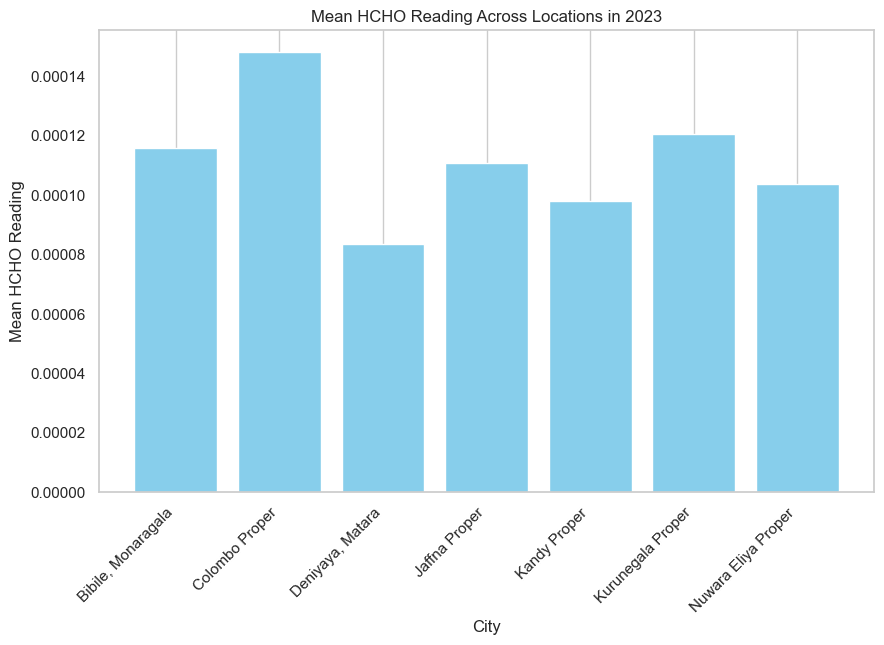

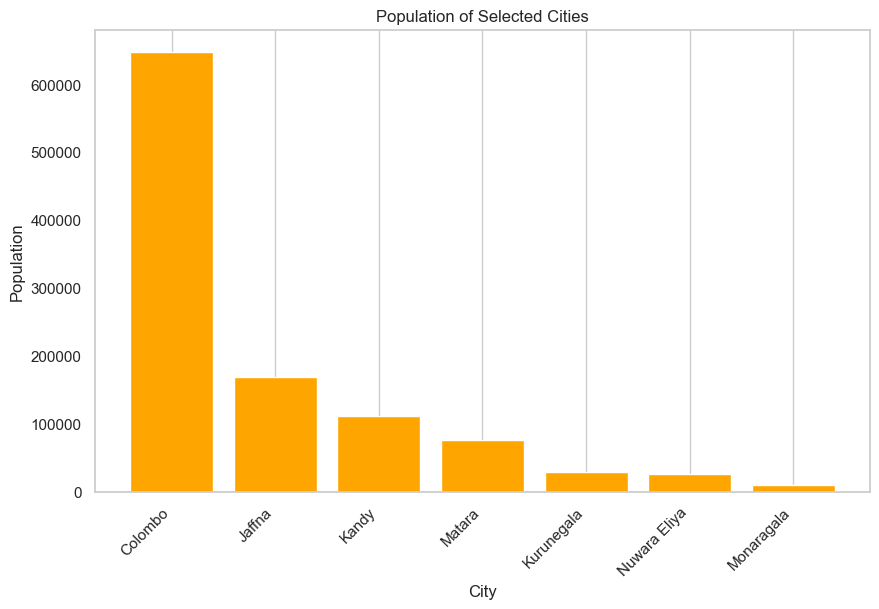

In [214]:
# Reset the index to make 'Location' and 'Year' columns again
hcho_2023_city = hcho_2023_city.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hcho_2023_city['Location'], hcho_2023_city['HCHO Reading'], color='skyblue')
plt.title('Mean HCHO Reading Across Locations in 2023')
plt.xlabel('City')
plt.ylabel('Mean HCHO Reading')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(city_population['city'], city_population['pop2024'], color='orange')
plt.title('Population of Selected Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In here also you can see that based on population that colombo takes the highest HCHO Levels and others are the same according to the Population. But the interesting point is that the lowest popluation amongst the all is Monaragala and the HCHO Levels of the Monaragala is quite high. It is an exceptional data point that needed to be considered.

# HCHO Comparison based on the Altitude of the Cities

Heres are the altitudes that gained for each city in Sri Lanka.
1. Colombo: Sea level (0 meters above sea level)
2. Jaffna: Sea level (0 meters above sea level)
3. Nuwara Eliya: Approximately 1,868 meters above sea level
4. Kurunegala: Approximately 116 meters above sea level
5. Kandy: Approximately 500 meters above sea level
6. Matara: Approximately 9 meters above sea level
7. Monaragala: Approximately 158 meters above sea level

Data Source :- https://en-in.topographic-map.com/

For comparison let's take 3 cities which is Jaffna near to the sea level, Kandy a quite high altitude and Nuwara Eliya with the highest altitude in the given dataset.

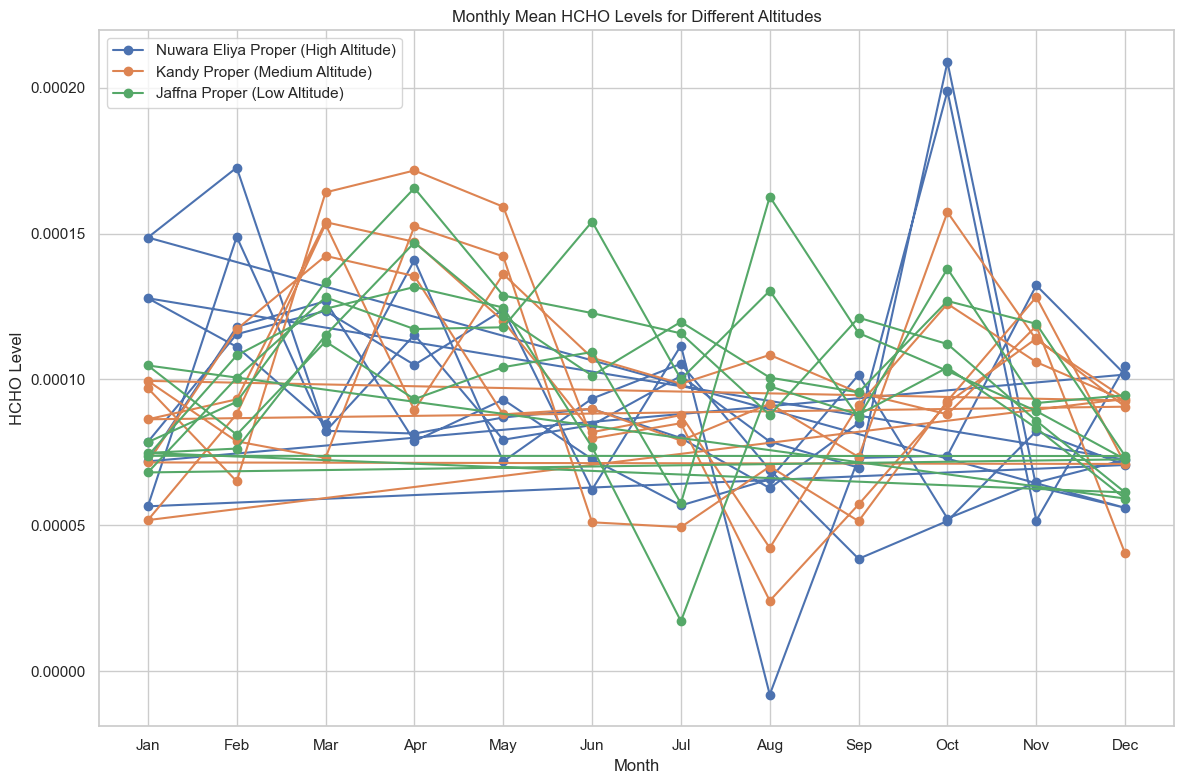

In [215]:
# Categorizing three cities
high_altitude = HCHO_data[HCHO_data['Location'] == 'Nuwara Eliya Proper']
medium_altitude = HCHO_data[HCHO_data['Location'] == 'Kandy Proper']
low_altitude = HCHO_data[HCHO_data['Location'] == 'Jaffna Proper']

# Group data by year and month to get the mean HCHO value for all the years
high_altitude_hcho = high_altitude.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()
medium_altitude_hcho = medium_altitude.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()
low_altitude_hcho = low_altitude.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

plt.plot(high_altitude_hcho['Month'], high_altitude_hcho['HCHO Reading'], label='Nuwara Eliya Proper (High Altitude)', marker='o')
plt.plot(medium_altitude_hcho['Month'], medium_altitude_hcho['HCHO Reading'], label='Kandy Proper (Medium Altitude)', marker='o')
plt.plot(low_altitude_hcho['Month'], low_altitude_hcho['HCHO Reading'], label='Jaffna Proper (Low Altitude)', marker='o')

# plot details
plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('Monthly Mean HCHO Levels for Different Altitudes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()

Well according to this graph all the HCHO levels in three different altitudes are aligns mostly the same but in some times we can see in Nuwara Eliya some high HCHO Level Spikes. Other than that almost the same. But Remembering that everything affects in each city also affects with this hypothesis too. We cannot rely on just altitude because some humon resources may impact the spikes. But overall we can say that their is a slight impact on altitude when considering this graph. Nuwara Eliya has some high ping points in this graph.

## HCHO Levels Changes within Covid-19 Lockdown-Period

Comparison of how HCHO levels changes over the period of covid-19 lockdowns in Sri Lanka.

### Overall HCHO Data

In [216]:
# Define COVID period 
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2021-07-01')
HCHO_data['Current Date'] = pd.to_datetime(HCHO_data['Current Date'])

### All the cities plot

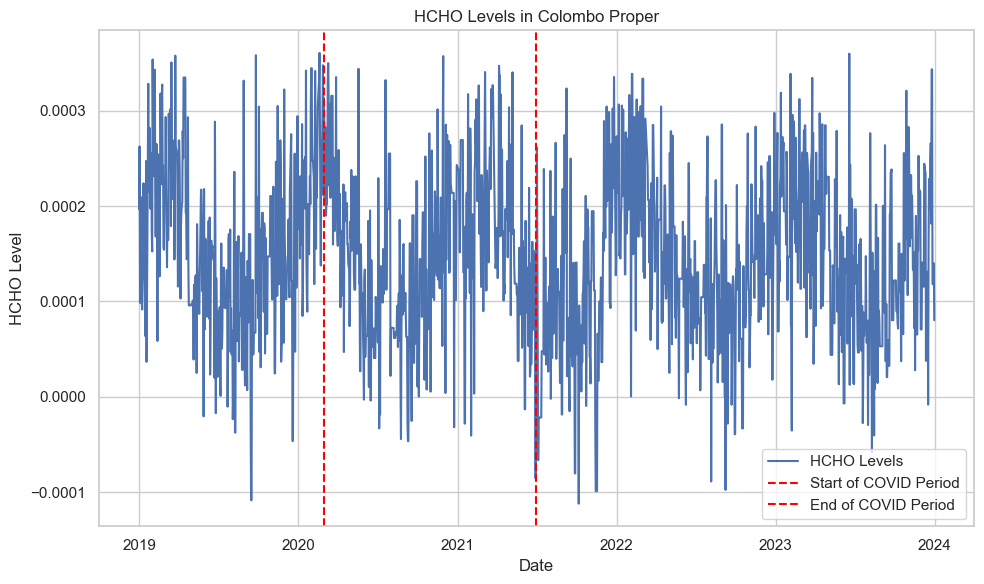

Mean HCHO levels in Colombo Proper:
Pre-COVID: 0.000159187632318497
During COVID: 0.00015263934662520105
Post-COVID: 0.00013934881759409236


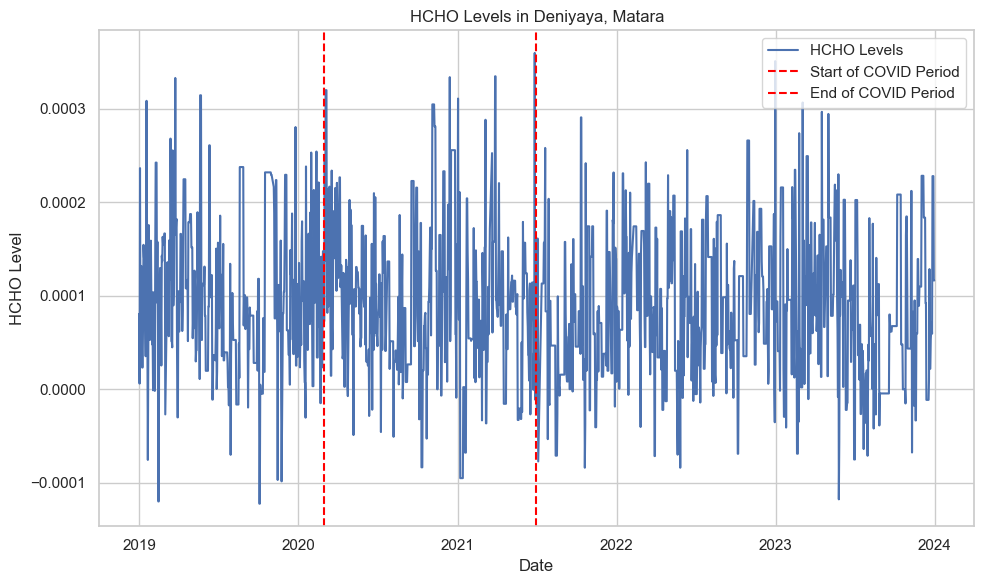

Mean HCHO levels in Deniyaya, Matara:
Pre-COVID: 9.722059524127197e-05
During COVID: 9.504070740221398e-05
Post-COVID: 8.500119637246978e-05


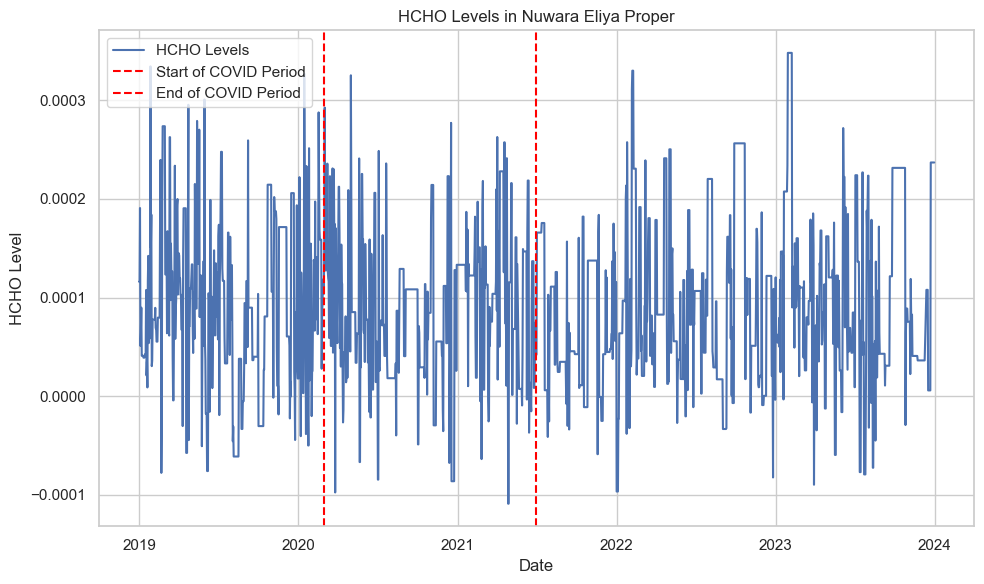

Mean HCHO levels in Nuwara Eliya Proper:
Pre-COVID: 9.148478420765092e-05
During COVID: 8.828444611687559e-05
Post-COVID: 9.334461844477664e-05


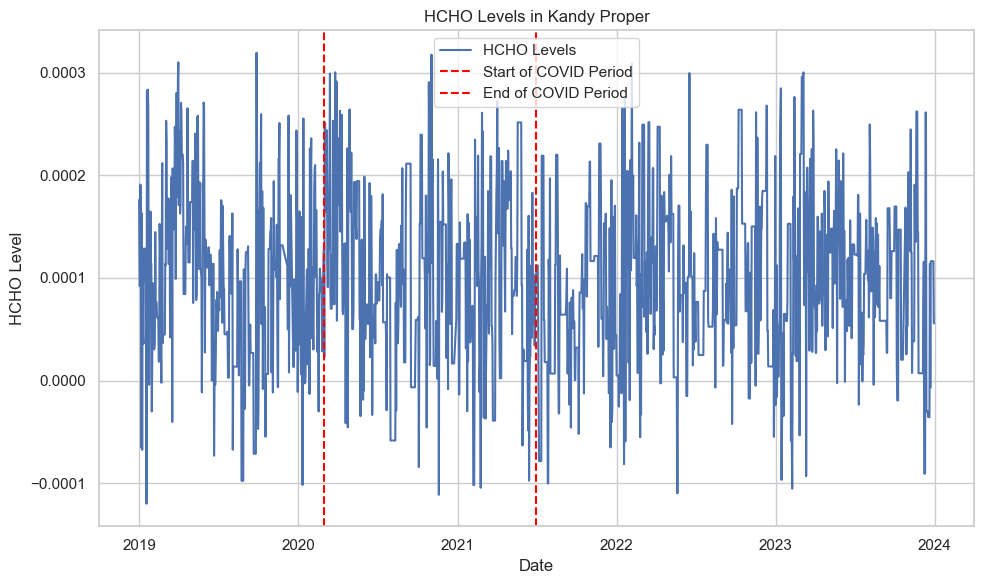

Mean HCHO levels in Kandy Proper:
Pre-COVID: 9.86653652060536e-05
During COVID: 0.0001027777670513028
Post-COVID: 9.643577800181605e-05


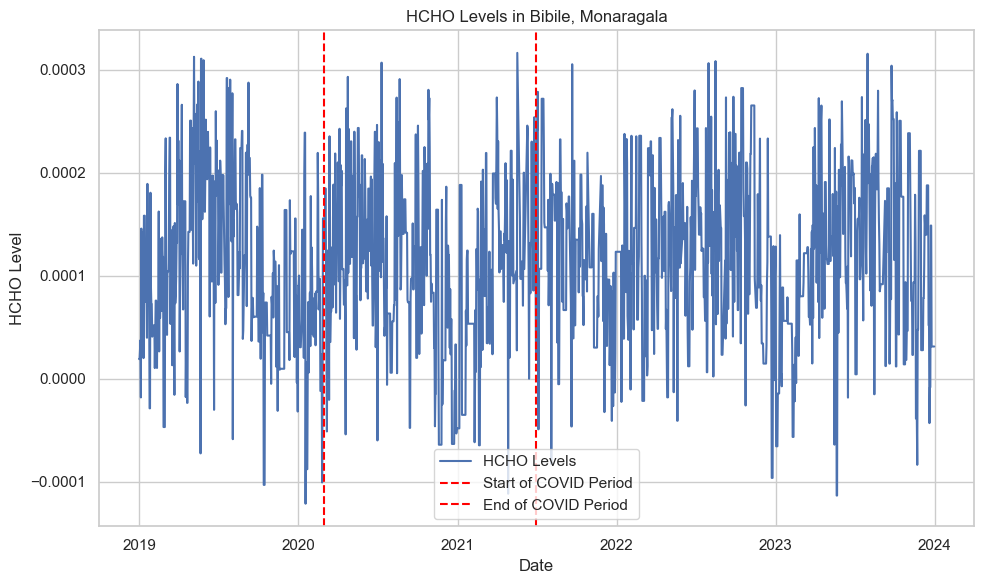

Mean HCHO levels in Bibile, Monaragala:
Pre-COVID: 0.00010985987744937314
During COVID: 0.00010735832592538897
Post-COVID: 0.00012104051676741157


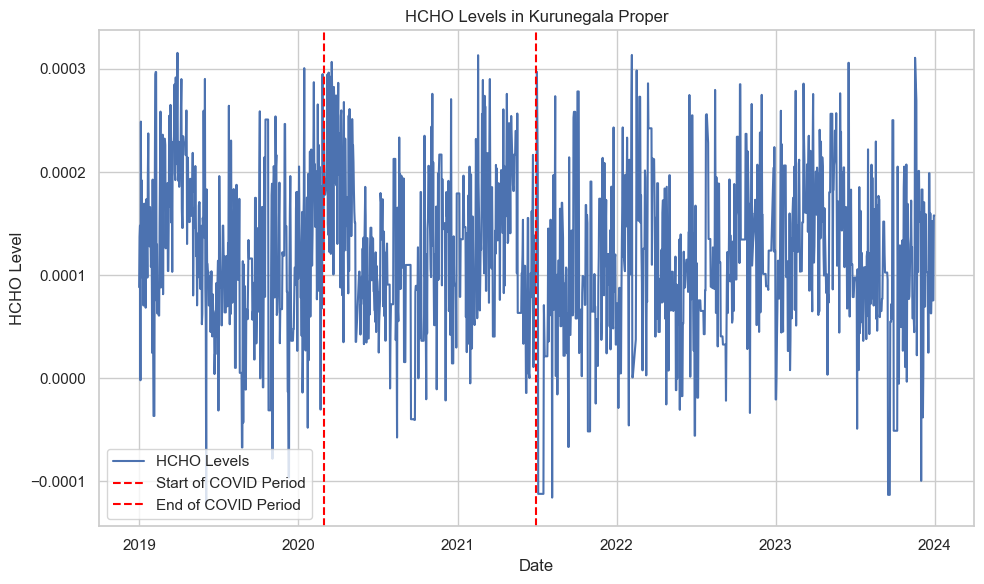

Mean HCHO levels in Kurunegala Proper:
Pre-COVID: 0.00012511192218909493
During COVID: 0.00012864740579007994
Post-COVID: 0.00011165319500076992


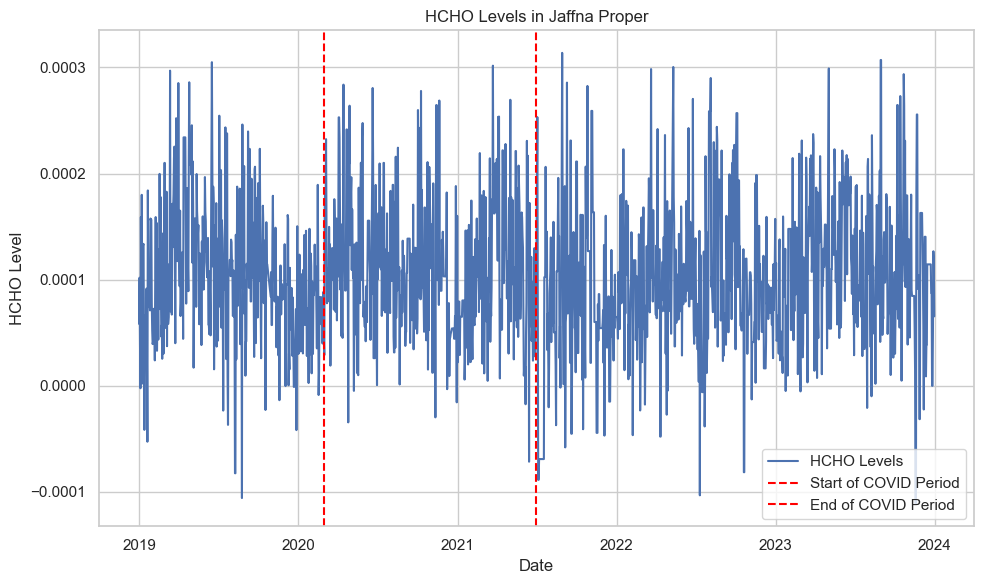

Mean HCHO levels in Jaffna Proper:
Pre-COVID: 0.00010394014876137754
During COVID: 0.00011015867697861646
Post-COVID: 9.93481188012774e-05


In [224]:
# Get unique locations
unique_locations = HCHO_data['Location'].unique()

# Iterate through each location
for location in unique_locations:
    # Filter data for the current location
    location_data = HCHO_data[HCHO_data['Location'] == location]
    
    # Dividing data into pre-COVID, COVID, and post-COVID periods
    pre_covid_data = location_data[location_data['Current Date'] < covid_start_date]
    covid_data = location_data[(location_data['Current Date'] >= covid_start_date) & (location_data['Current Date'] <= covid_end_date)]
    post_covid_data = location_data[location_data['Current Date'] > covid_end_date]

    # Aggregate data by calculating mean HCHO levels for each period
    pre_covid_mean = pre_covid_data['HCHO Reading'].mean()
    covid_mean = covid_data['HCHO Reading'].mean()
    post_covid_mean = post_covid_data['HCHO Reading'].mean()

    # Visualize data
    plt.figure(figsize=(10, 6))
    plt.plot(location_data['Current Date'], location_data['HCHO Reading'], label='HCHO Levels')
    plt.axvline(x=covid_start_date, color='red', linestyle='--', label='Start of COVID Period')
    plt.axvline(x=covid_end_date, color='red', linestyle='--', label='End of COVID Period')
    plt.title(f'HCHO Levels in {location}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Level')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print mean HCHO levels for each period
    print(f"Mean HCHO levels in {location}:")
    print("Pre-COVID:", pre_covid_mean)
    print("During COVID:", covid_mean)
    print("Post-COVID:", post_covid_mean)



For each city you can see that during the locdown periods the mean of HCHO Levels are getting lower. It ensures that the reduce of human activities will make the air will better reducing those toxic HCHO gas.